# Predictive Modeling for Car Insurance Claim Probability

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem Statement
- Car insurance companies face significant challenges in accurately assessing risk and determining appropriate premiums for policyholders. The ability to predict the probability of claims, including both the frequency and severity of claims, is crucial for improving risk management and financial performance. Currently, many insurance companies rely on traditional methods that may not fully capture the complexities and nuances of various risk factors associated with car insurance claims. This project aims to develop a predictive model that leverages machine learning techniques to assess the claim probability for car insurance policies, enabling insurance companies to better understand the factors influencing claims and enhance their risk assessment and premium determination processes.

## Objective
#### The primary objective of this project is to develop a robust predictive model that accurately forecasts the probability of claims for car insurance policies.
- Identify and analyze the key factors that influence the frequency and severity of car insurance claims.
- Develop and validate machine learning models to predict the likelihood of claims within a six-month period.
- Provide actionable insights and recommendations to insurance companies for improved risk assessment and premium determination.
- Enhance the overall efficiency and effectiveness of the car insurance underwriting process by integrating predictive analytics into decision-making workflows.

## Features and Description

- policy_id: The unique identifier for each insurance policy.

- policy_tenure: The length of time (in years) that the policy has been active.

- age_of_car: The age of the insured car (in years) at the time the policy was taken.

- age_of_policyholder: The age of the policyholder (in years) at the time the policy was taken.

- area_cluster: A categorical variable representing the cluster or category to which the area of residence belongs.

- population_density: A measure of the population density of the area where the policyholder resides.

- Make:  The make or manufacturer of the insured car.

- segment: The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).

- model: The specific model or variant of the insured car.

- fuel_type: The type of fuel used by the insured car (e.g., petrol, diesel, electric).

- max_torque: The maximum torque output of the car's engine.

- max_power: The maximum power output of the car's engine.

- engine_type: The type of engine used in the insured car (e.g., inline, V-type).

- airbags: The number of airbags installed in the car.

- is_esc: A binary variable indicating whether the car has an electronic stability control (ESC) system.

- is_adjustable_steering: A binary variable indicating whether the car has adjustable steering.

- is_tpms: A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).

- is_parking_sensors: A binary variable indicating whether the car has parking sensors.

- is_parking_camera: A binary variable indicating whether the car has a parking camera.

- rear_brakes_type: The type of rear brakes used in the car.

- displacement: The engine displacement of the car (typically measured in liters or cubic centimeters).

- cylinder: The number of cylinders in the car's engine.

- transmission_type: The type of transmission used in the car (e.g., manual, automatic).

- gear_box: The number of gears in the car's gearbox.

- steering_type: The type of steering system used in the car.

- turning_radius: The minimum radius of the circular path that the car can make.

- length: The length of the car.

- width: The width of the car.

- height: The height of the car.

- gross_weight: The gross weight or total weight of the car.

- is_front_fog_lights: A binary variable indicating whether the car has front fog lights.

- is_rear_window_wiper: A binary variable indicating whether the car has a rear window wiper.

- is_rear_window_washer: A binary variable indicating whether the car has a rear window washer.

- is_rear_window_defogger: A binary variable indicating whether the car has a rear window defogger.

- is_brake_assist: A binary variable indicating whether the car has a brake assist system.

- is_power_door_locks: A binary variable indicating whether the car has power door locks.

- is_central_locking: A binary variable indicating whether the car has central locking.

- is_power_steering: A binary variable indicating whether the car has power steering.

- is_driver_seat_height_adjustable: A binary variable indicating whether the driver's seat height is adjustable.

- is_day_night_rear_view_mirror: A binary variable indicating whether the car has a day/night rearview mirror

- is_ecw: A binary variable indicating whether the car has an electronic crash warning (ECW) system. ECW systems use sensors and algorithms to detect potential collisions and provide warnings to the driver.

- is_speed_alert: A binary variable indicating whether the car has a speed alert system. Speed alert systems typically monitor the vehicle's speed and provide warnings or alerts to the driver when they exceed a predetermined speed limit.

- ncap_rating: The safety rating of the car according to the New Car Assessment Program (NCAP). NCAP is a government-backed program that evaluates and rates the safety performance of new car models in various crash tests and assessments. The rating is usually represented by a star system, with a higher number of stars indicating a better safety performance.

- is_claim: A binary variable indicating whether an insurance claim has been filed for the car policy. This variable determines whether an insurance event has occurred for a given policy, with a value of 1 indicating that a claim was filed and 0 indicating no claim was filed.

## 1. Importing the necessary libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## 2. Load the dataset

In [78]:
data = pd.read_csv('/content/drive/MyDrive/Learnbay_Project/Data.csv')
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [79]:
# Shape of the Dataframe
print("\nShape:")
data.shape


Shape:


(58592, 44)

In [80]:
df = data.copy(deep=True)

# 3. Exploratory Data Analysis

In [81]:
# Dataframe Information
print("\nDataframe Info: ")
print(df.info())


Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null 

- The dataset has no null values
- There are 28 categorical features and 16 numerical features

In [82]:
# Summary Statistics
print("\n Summary Statistics")
df.describe()


 Summary Statistics


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [83]:
# Let's check for missing values
df.isnull().sum().sum()

0

- The dataset has no missing values

In [84]:
# Check for duplicate values
df.duplicated().sum()

0

- There are no duplicate data in the dataset

In [85]:
# Classes in the target variable
df['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

- Binary classification problem
- Imbalance dataset

In [86]:
# drop policy_id
df = df.drop(columns=['policy_id'],axis=1)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [87]:
binary_cols = df.select_dtypes(include=['object']).columns
# Convert binary columns to 0 and 1
for col in binary_cols:
    if set(df[col].unique()) == {'Yes', 'No'}:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Identify numerical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns

In [88]:
numerical

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [89]:
# Categorical features
categorical = df.select_dtypes(include=['object']).columns
print("Categorical features: ", len(categorical))
print(categorical)

Categorical features:  10
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type',
       'steering_type'],
      dtype='object')


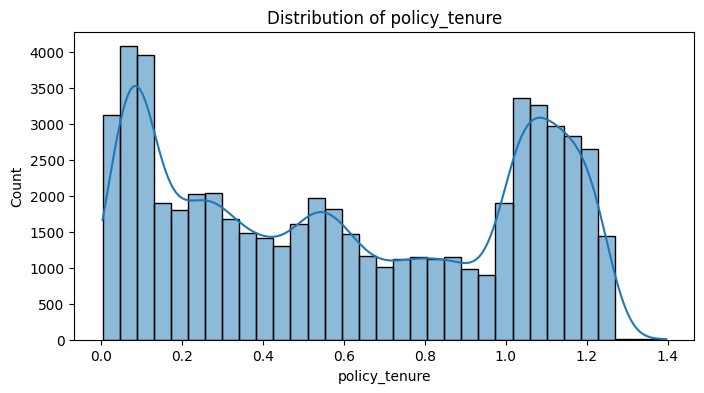

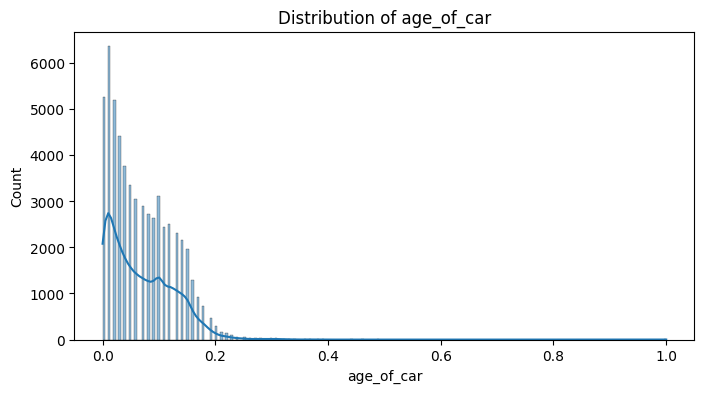

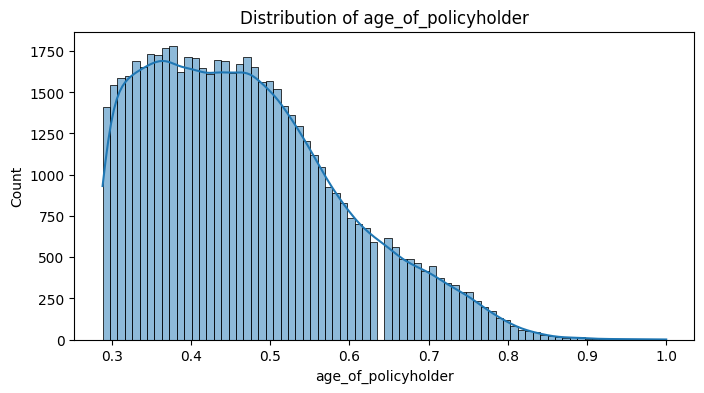

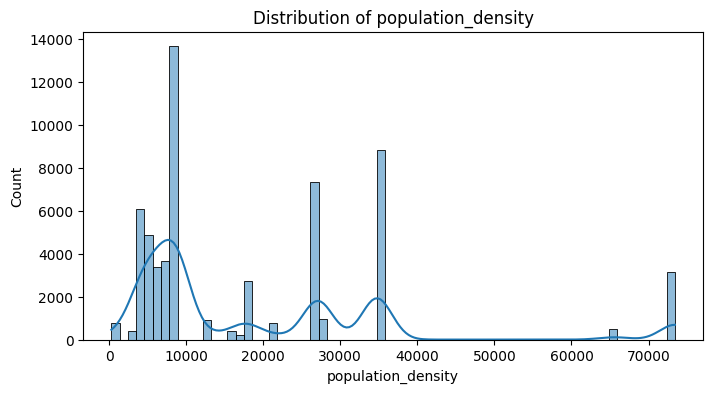

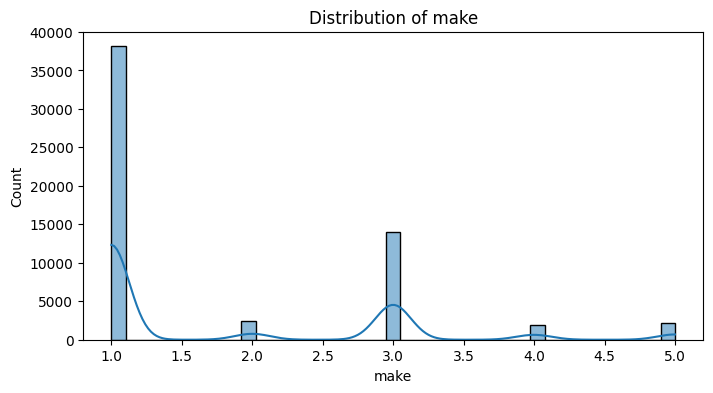

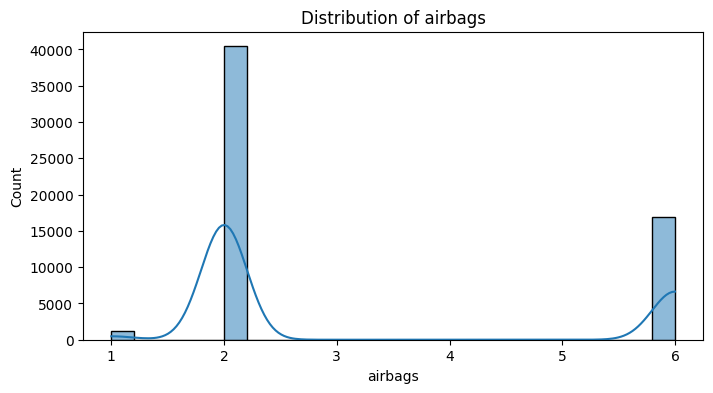

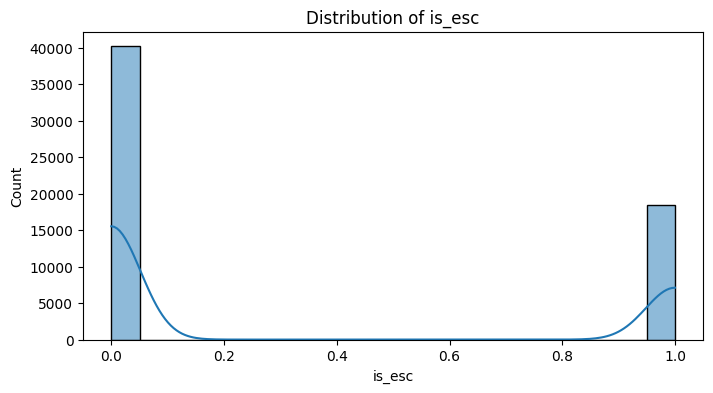

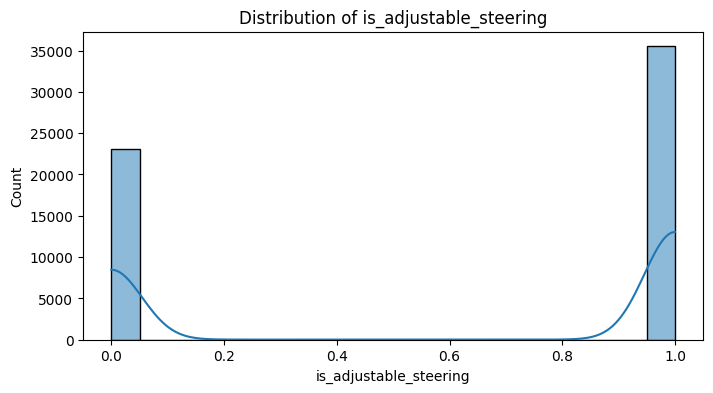

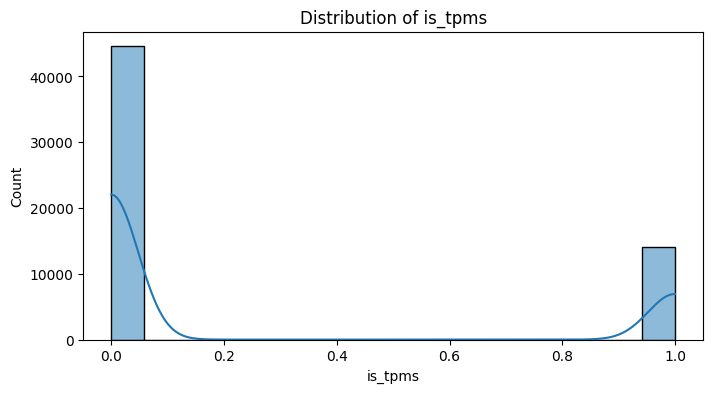

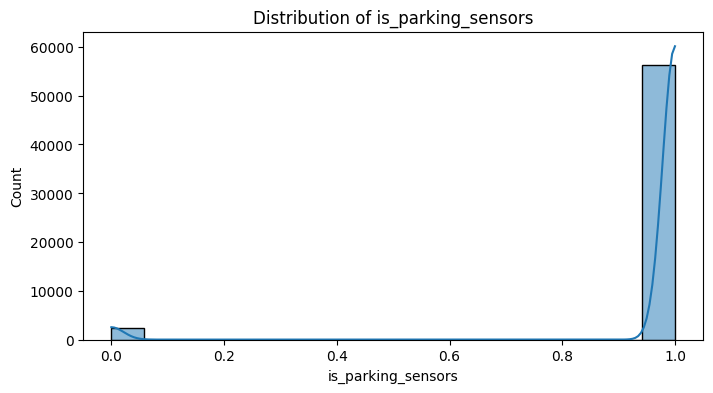

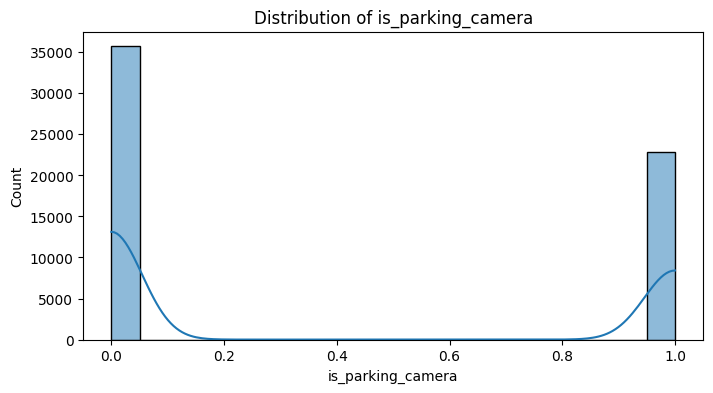

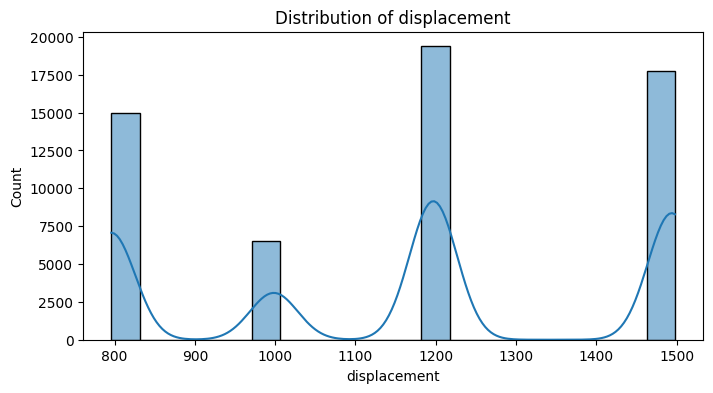

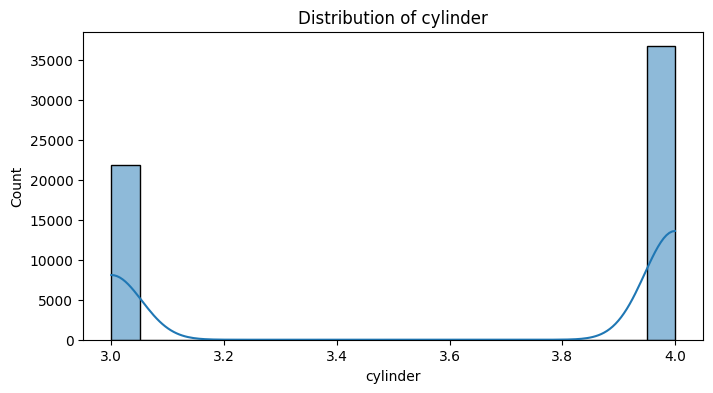

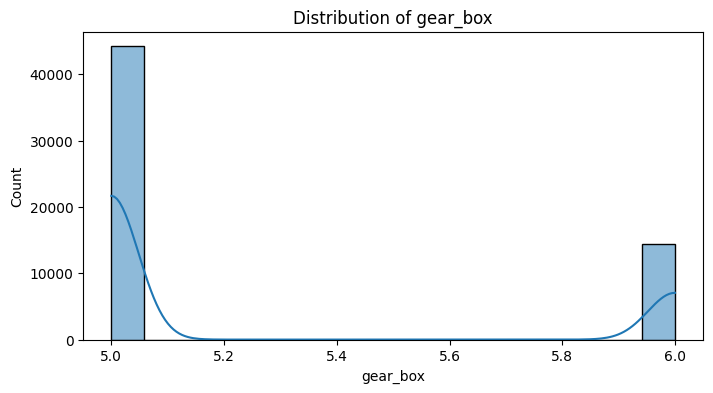

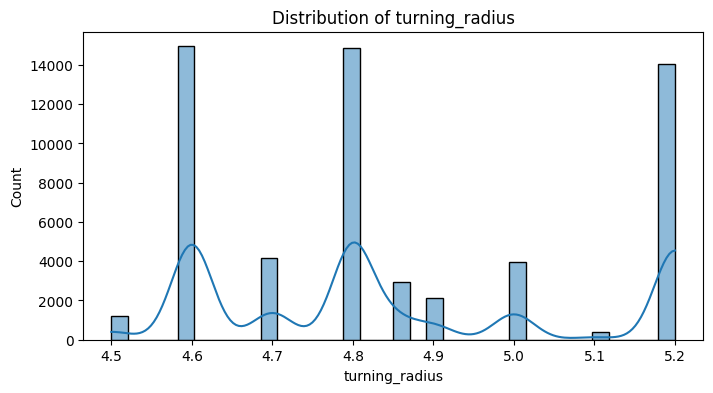

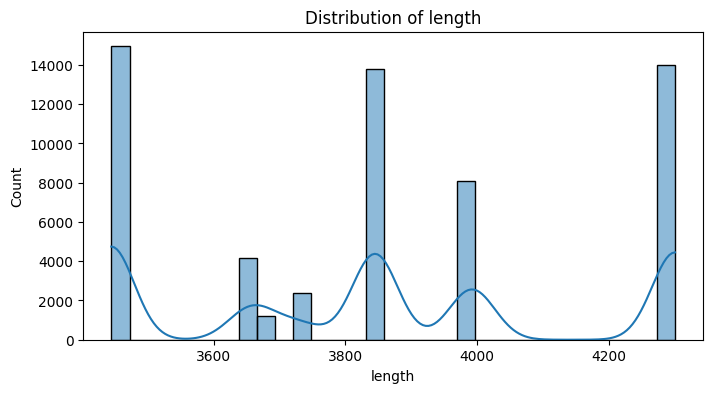

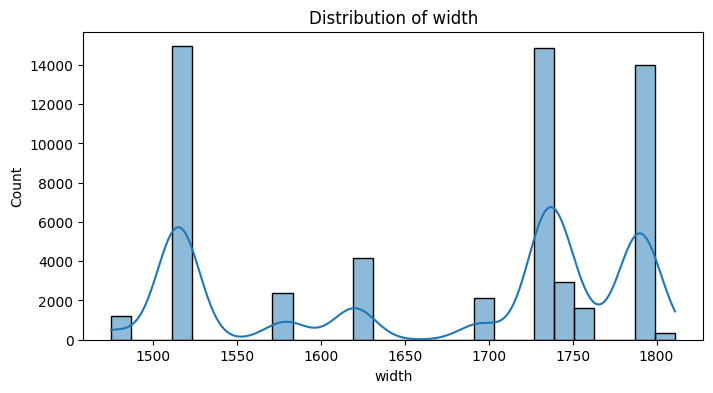

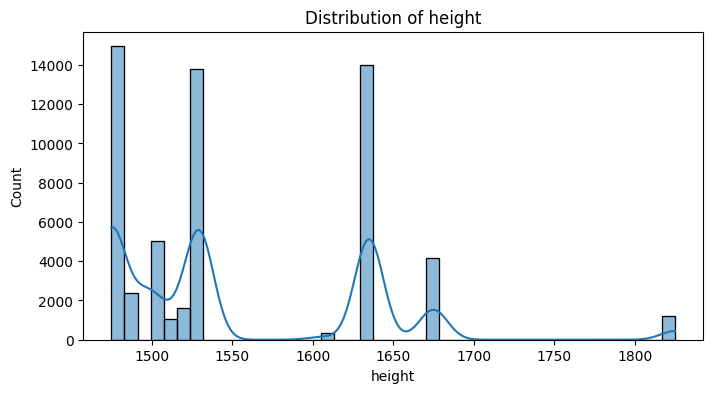

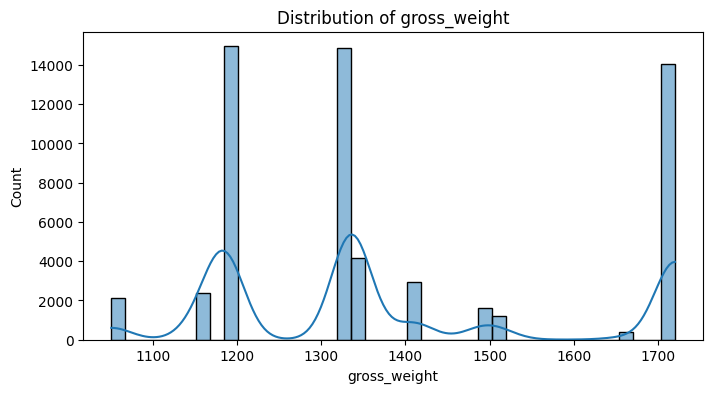

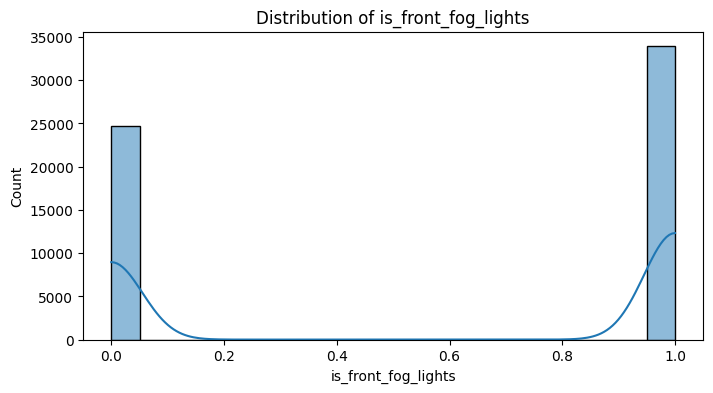

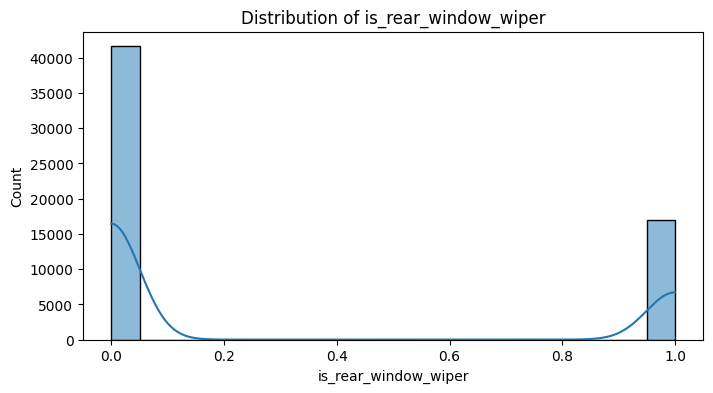

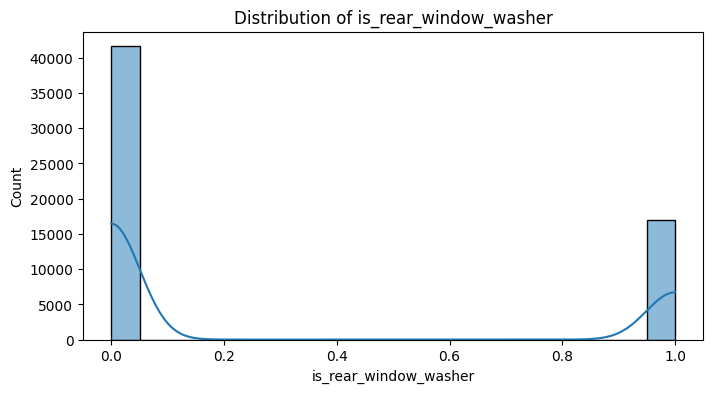

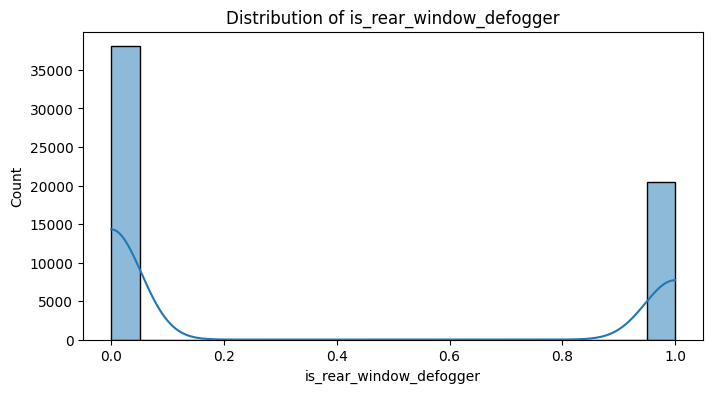

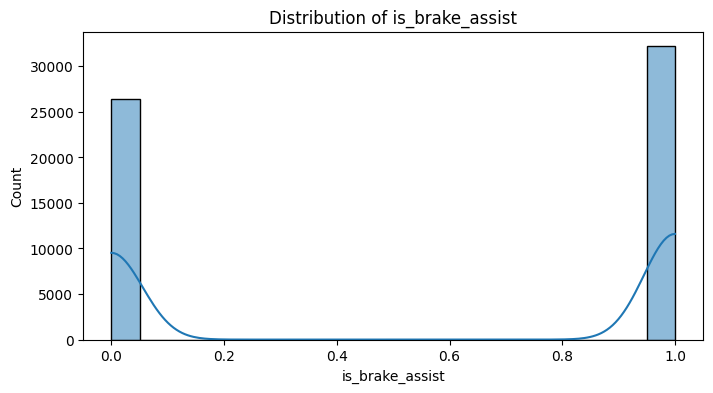

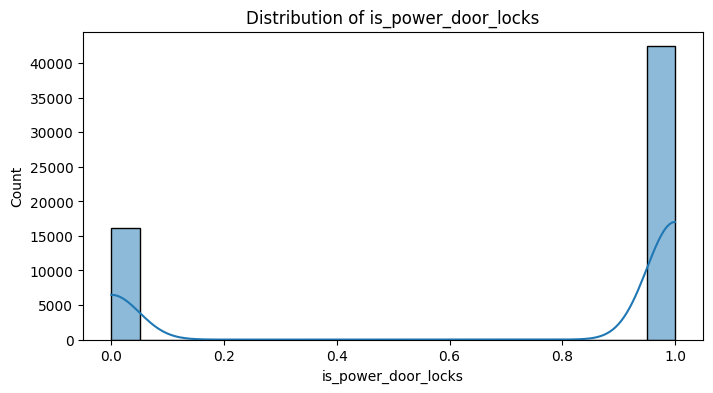

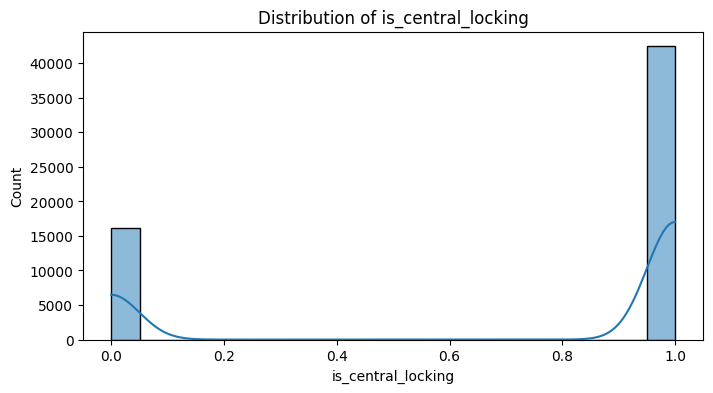

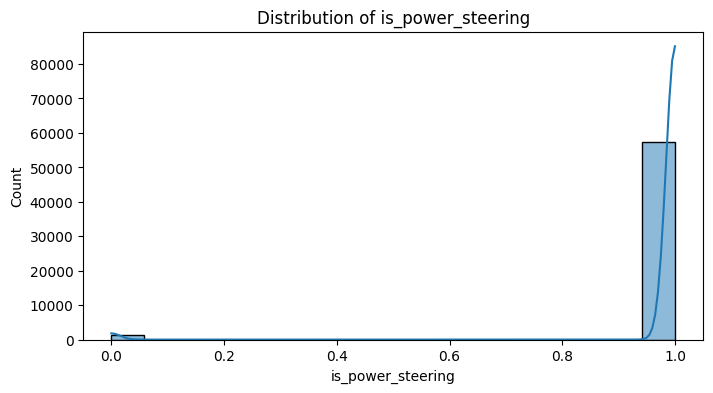

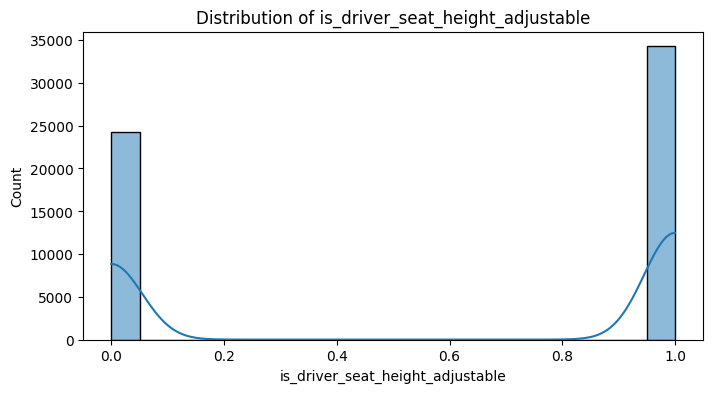

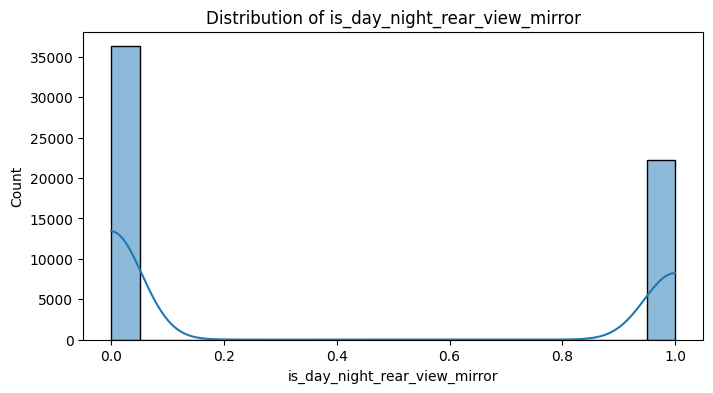

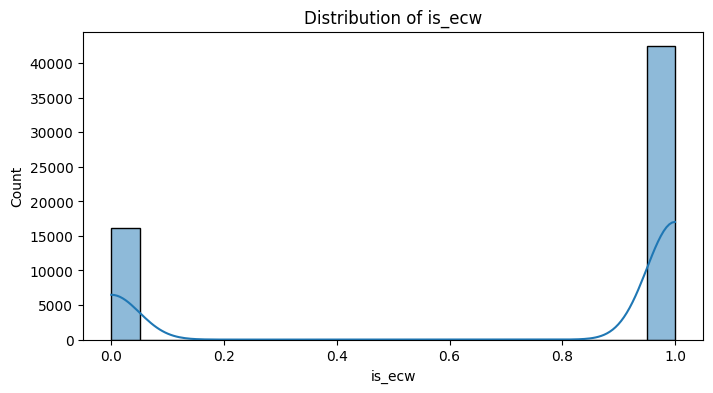

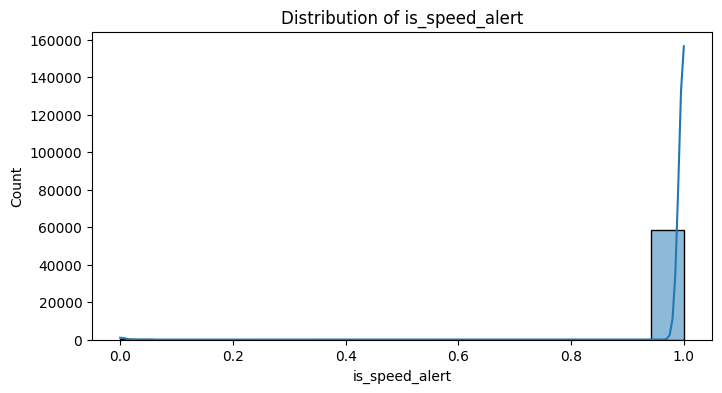

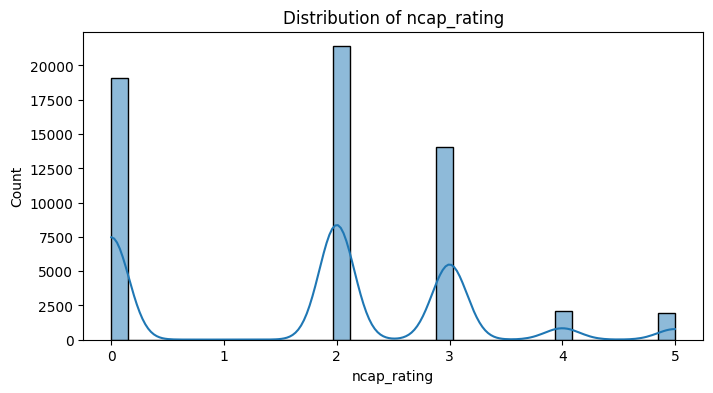

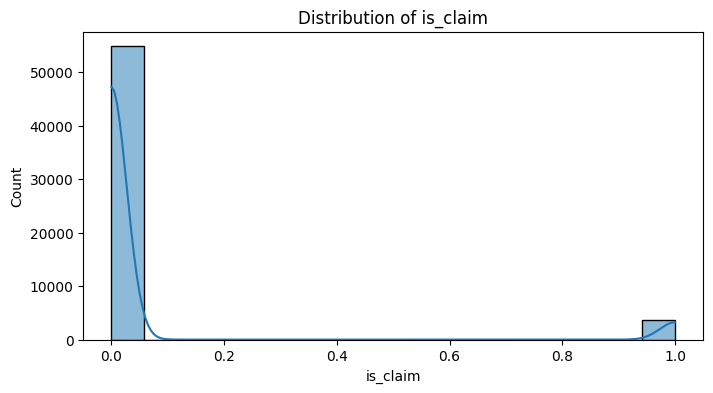

In [90]:
# Distribution of numerical features
for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

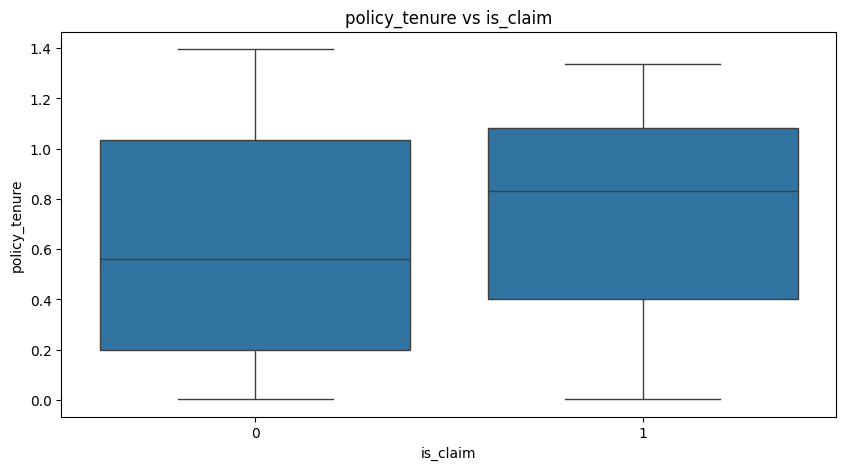

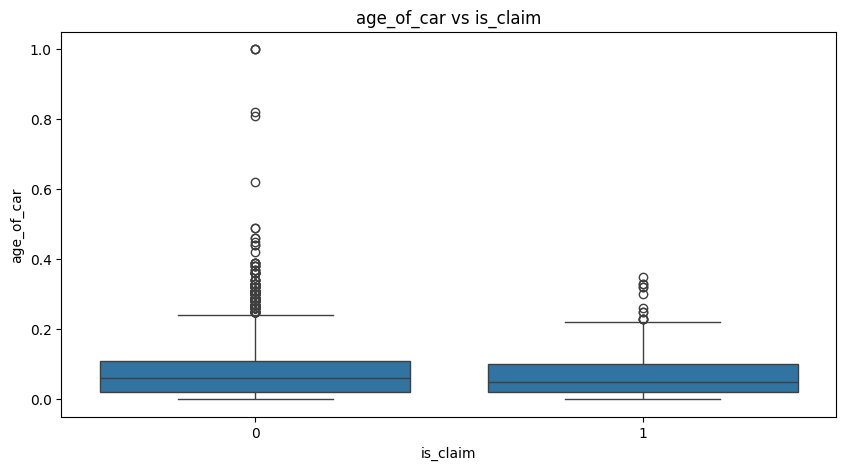

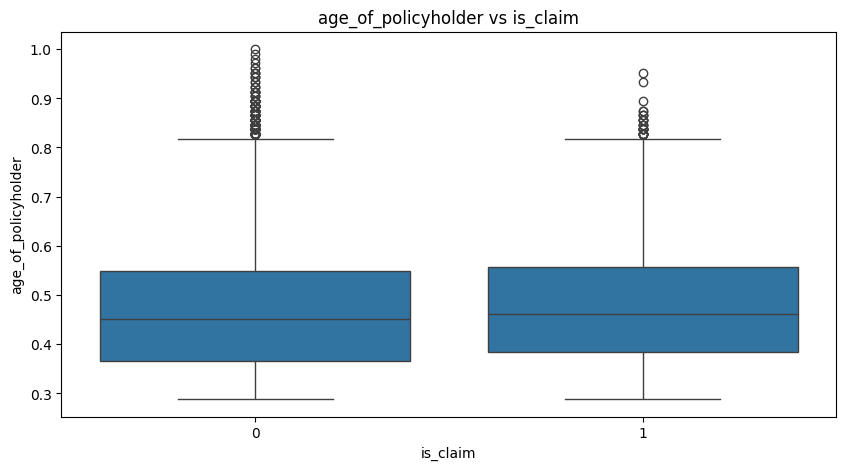

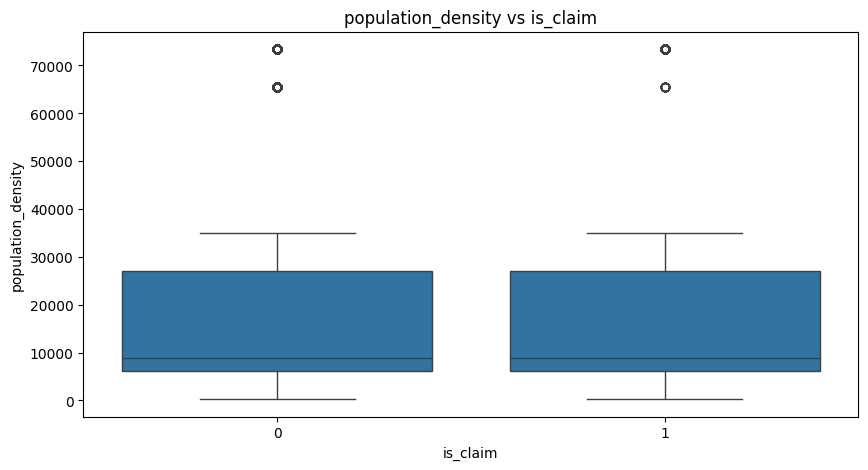

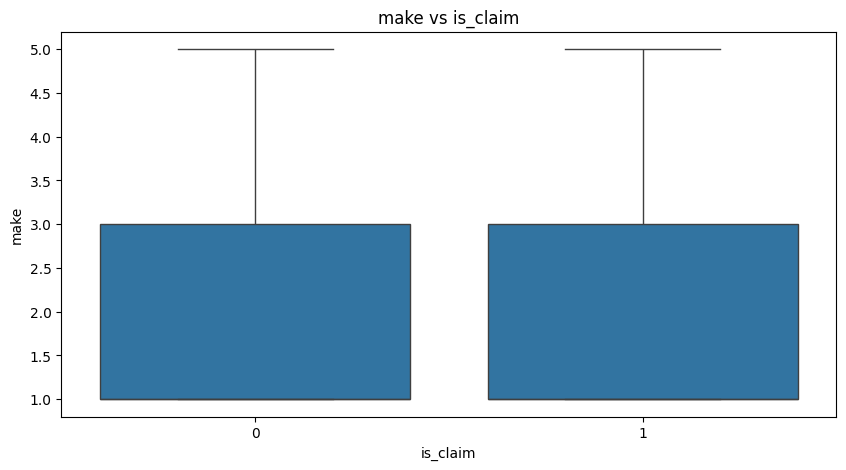

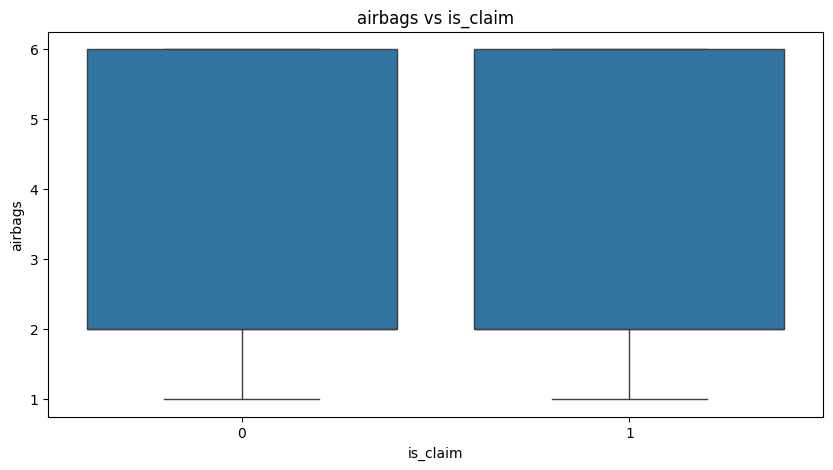

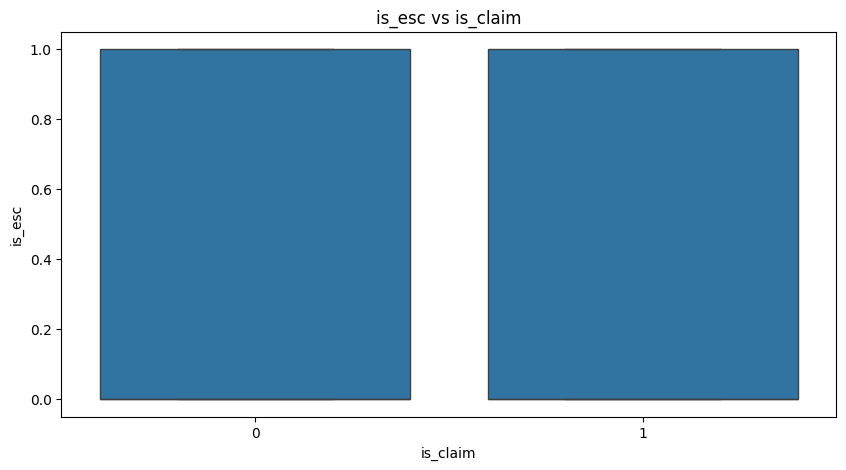

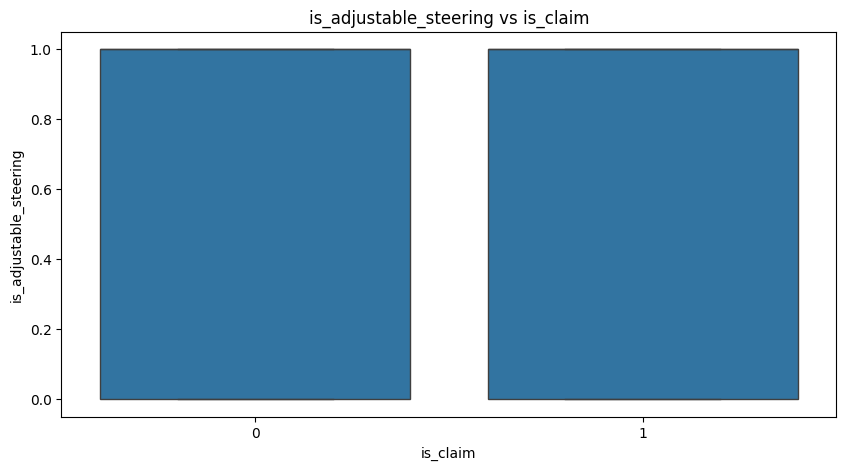

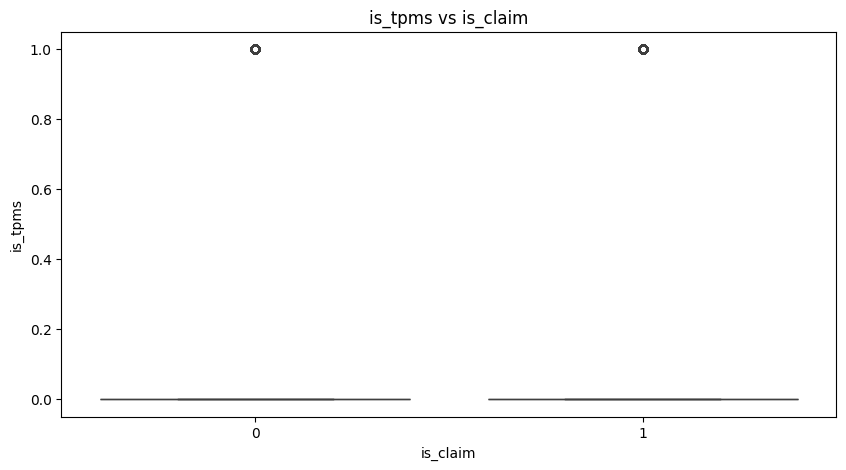

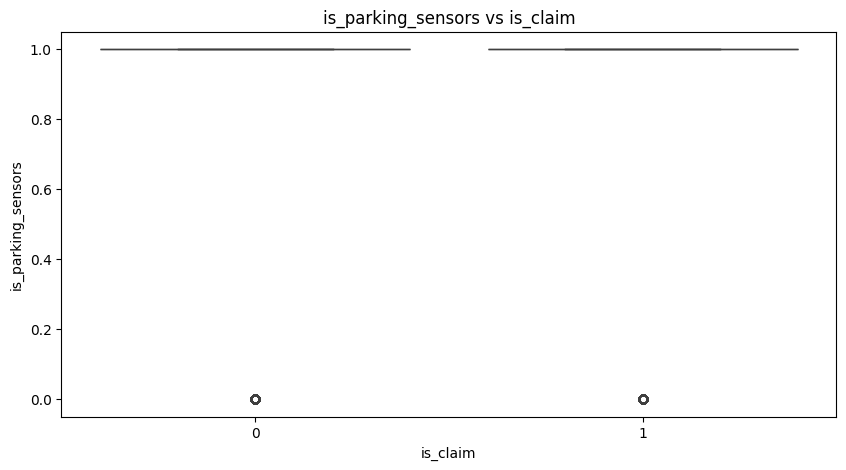

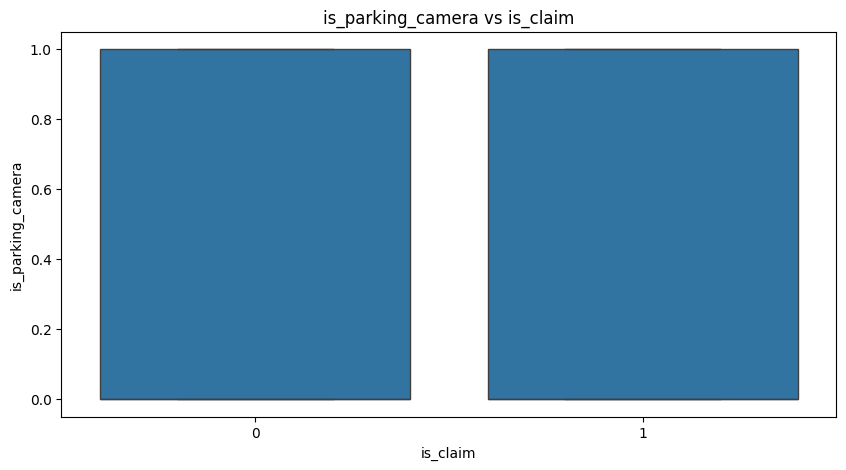

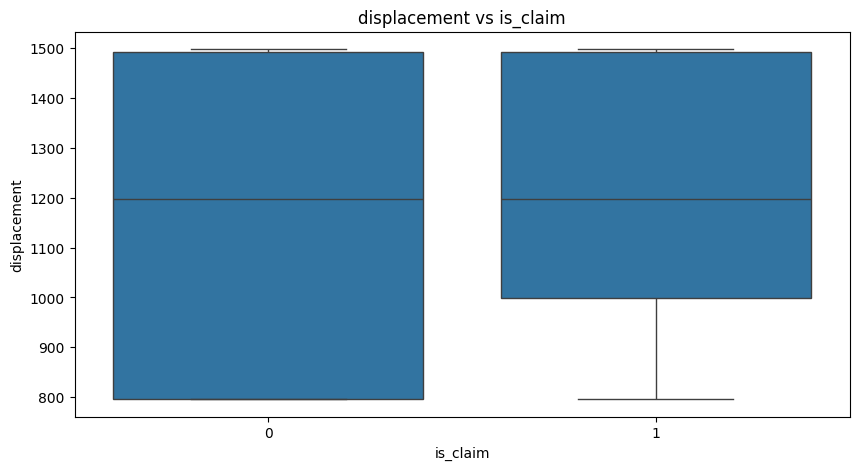

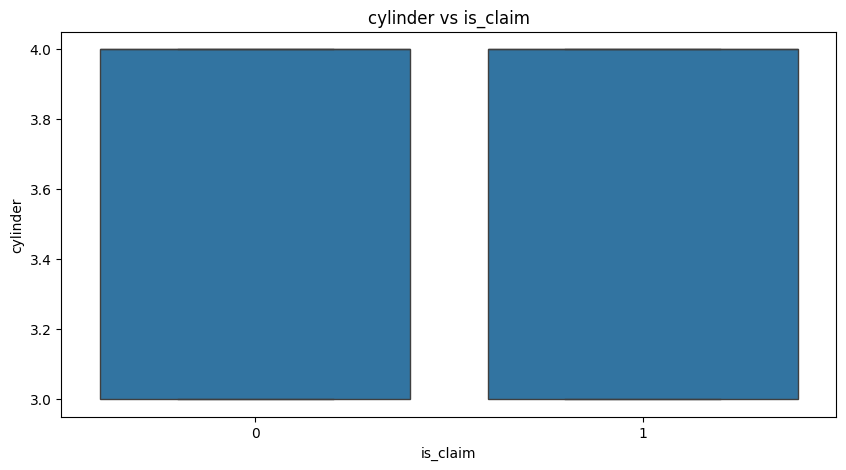

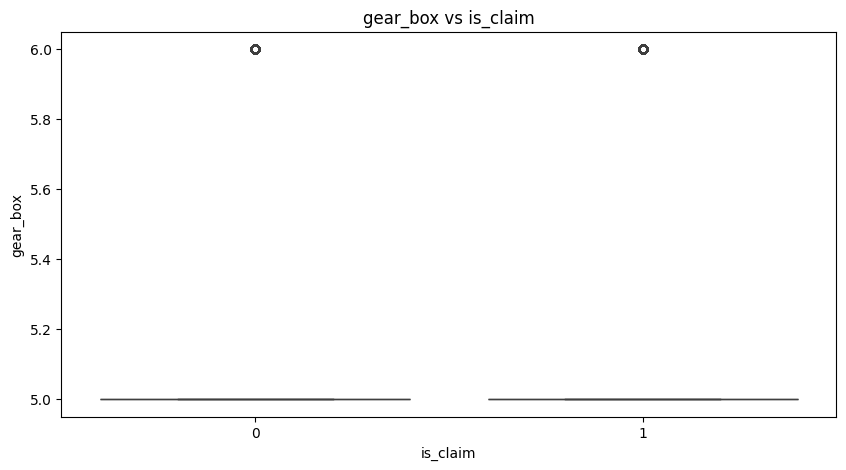

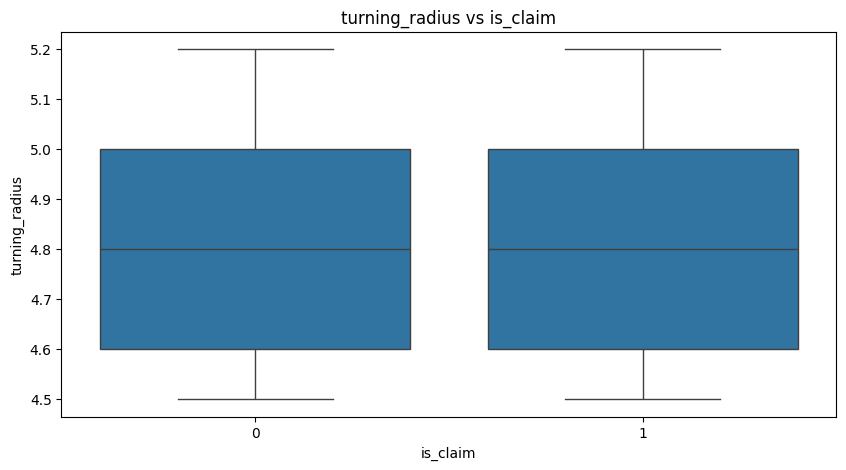

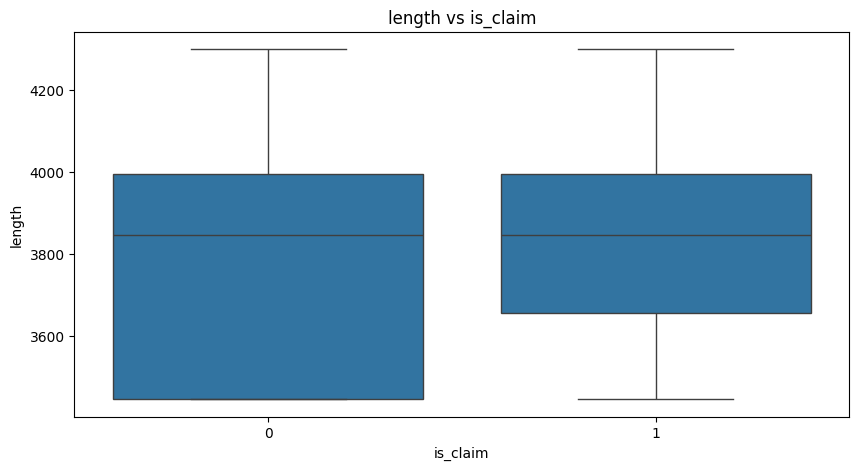

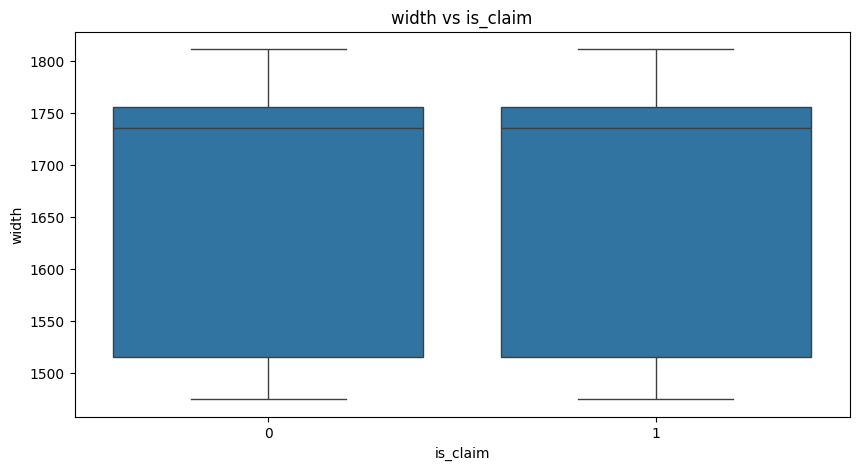

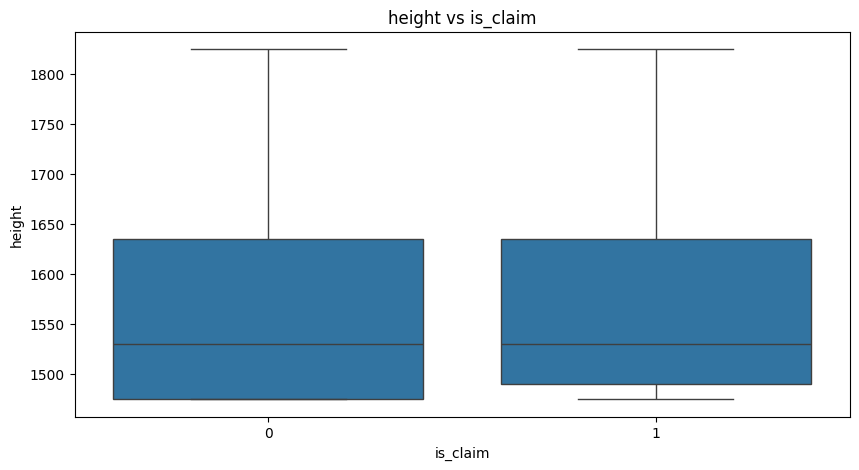

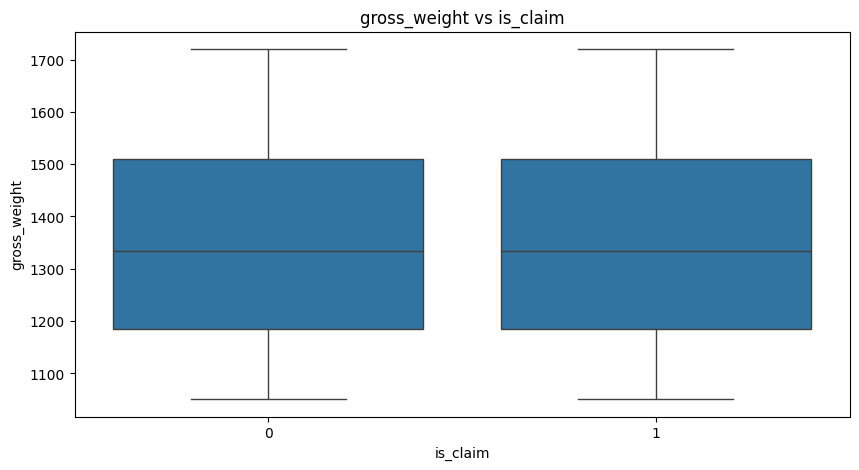

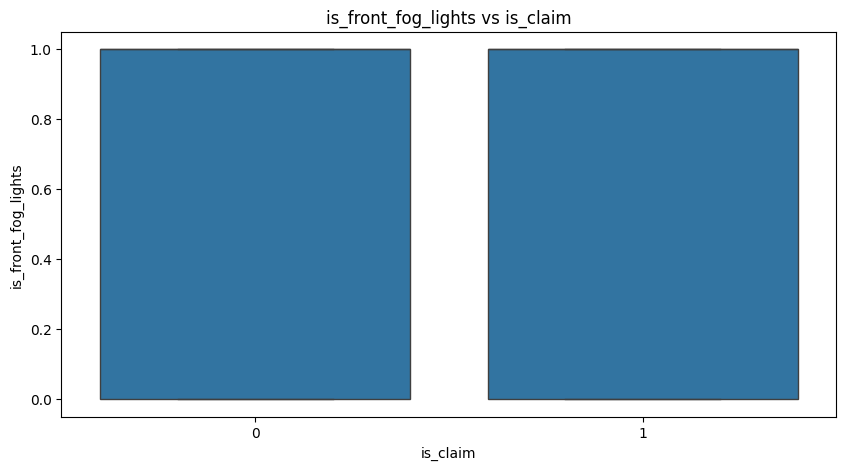

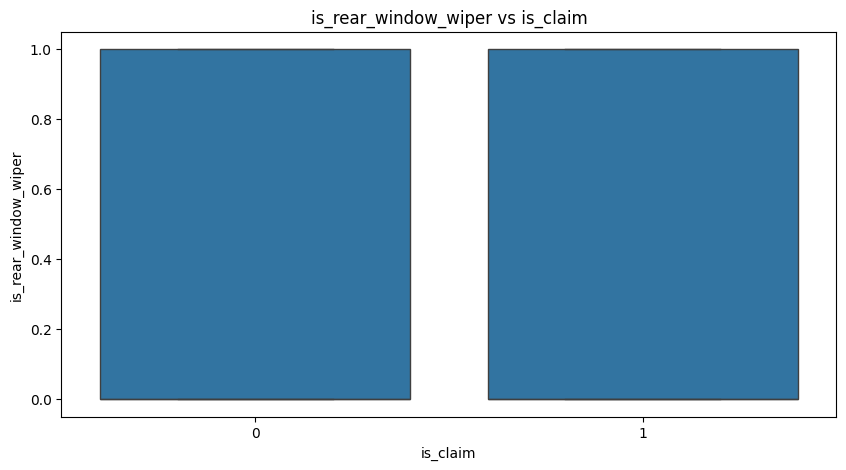

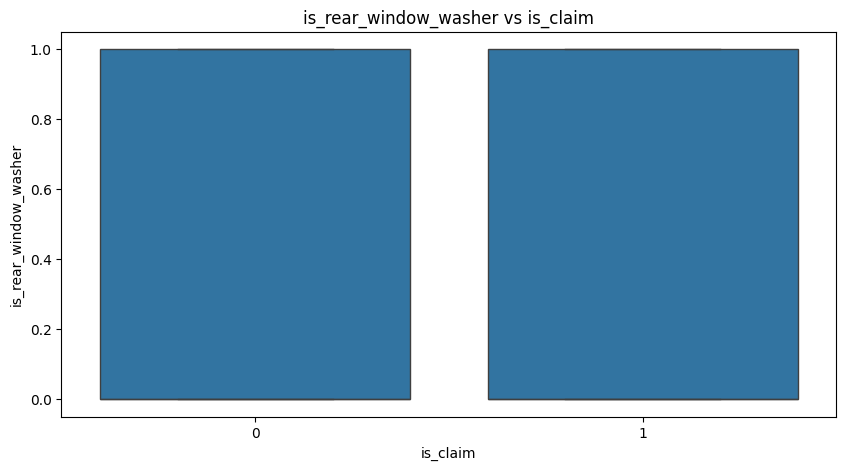

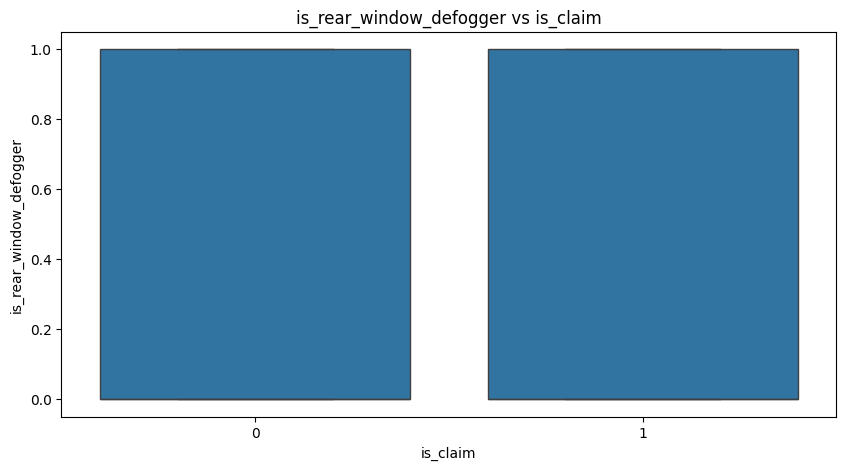

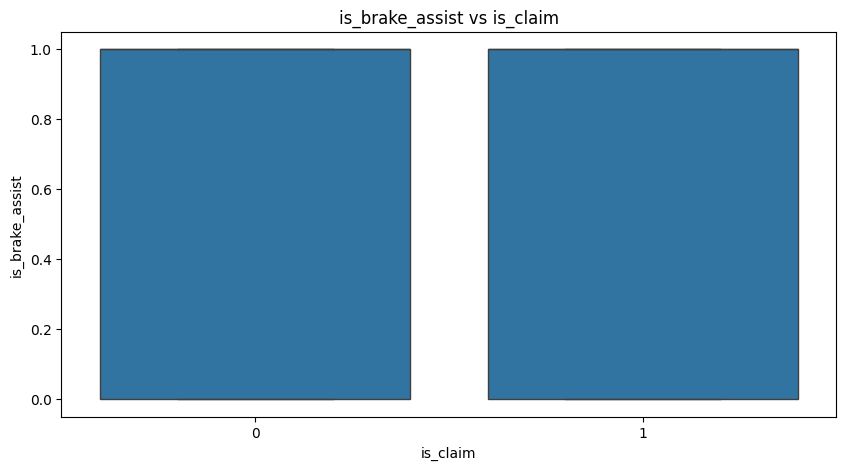

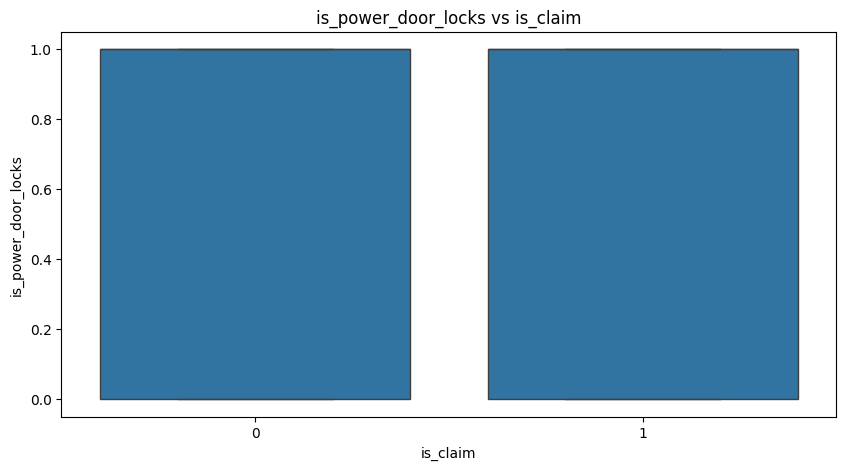

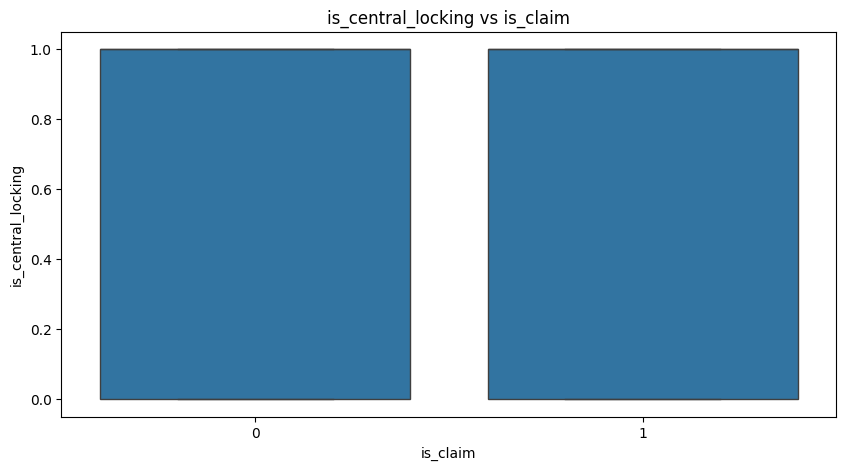

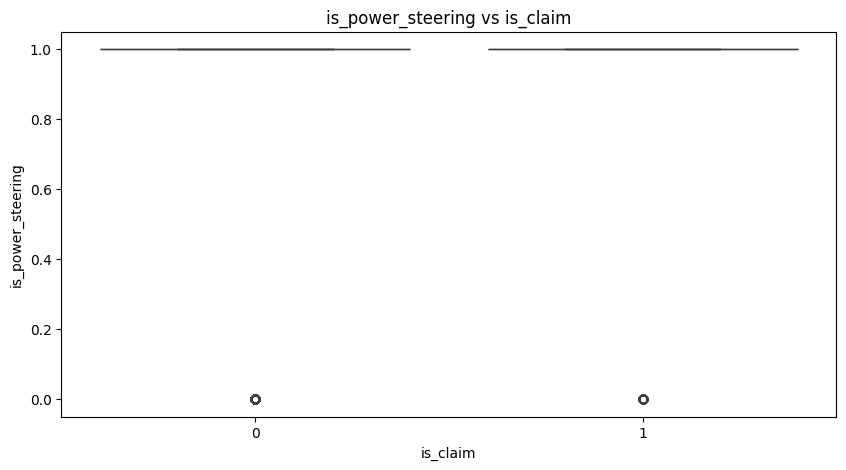

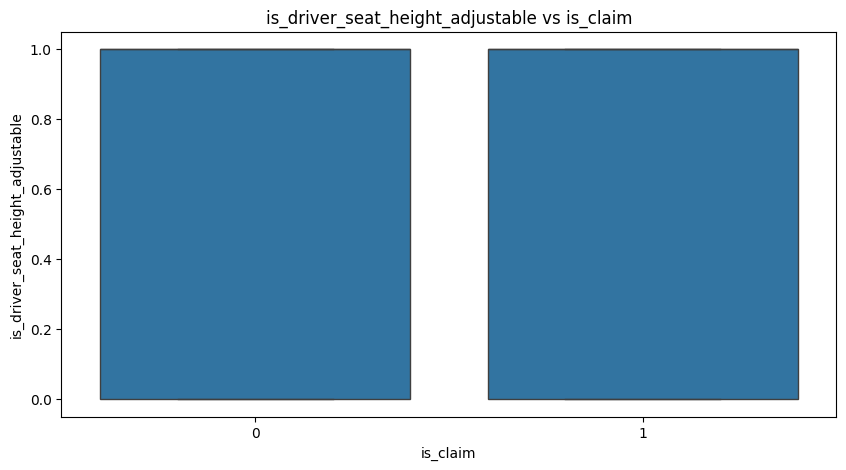

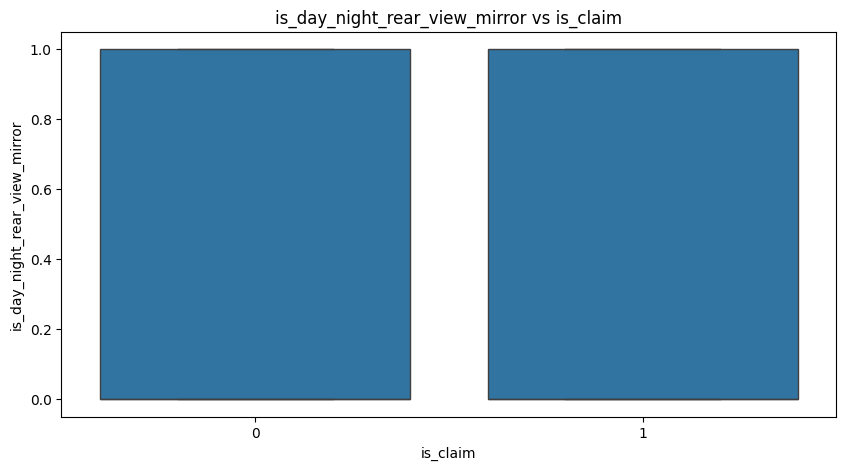

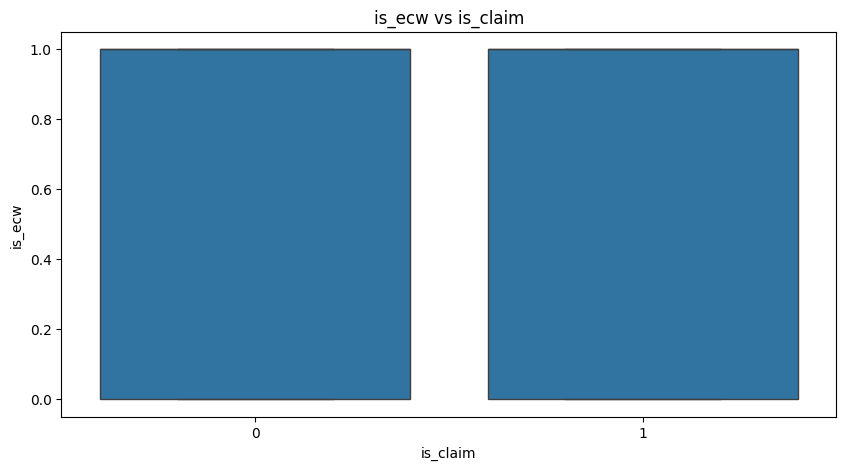

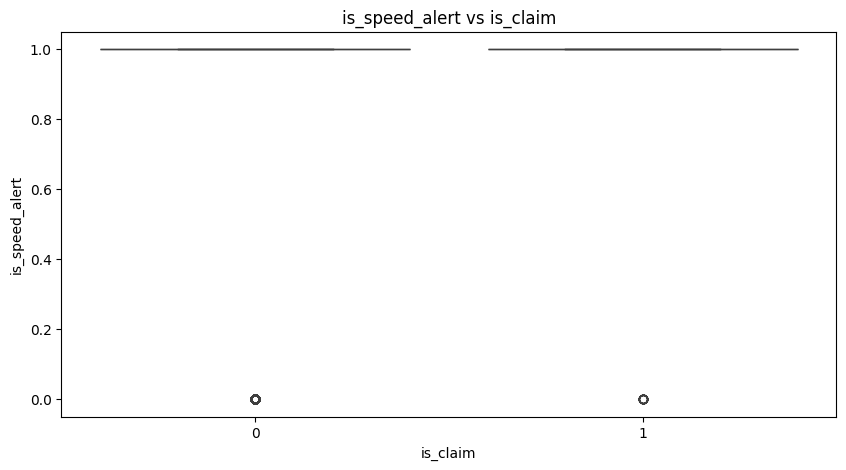

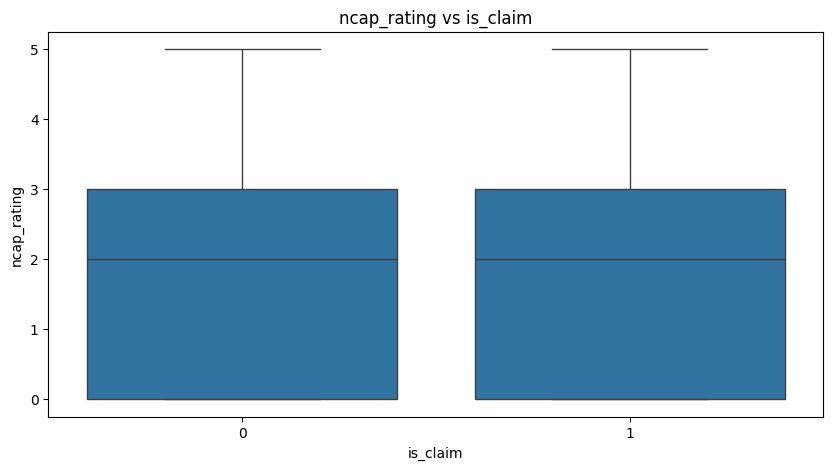

In [91]:
# Relationship between numerical features and target
for col in numerical:
    if col != 'is_claim':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df['is_claim'], y=df[col])
        plt.title(f'{col} vs is_claim')
        plt.show()

None of the features follow Normal Distribution.

In [92]:
categorical

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type',
       'steering_type'],
      dtype='object')

<Axes: xlabel='count', ylabel='fuel_type'>

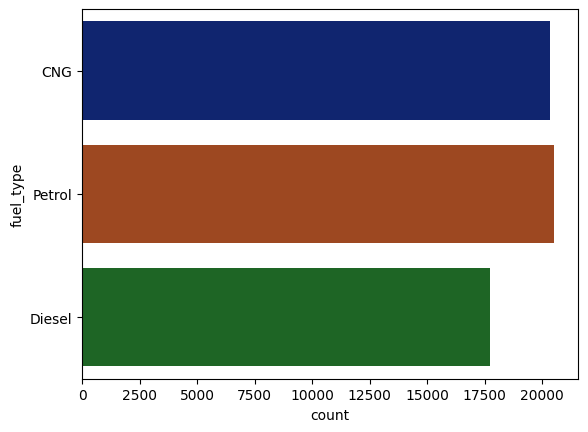

In [93]:
#plotting countplot for fuel_type
sns.countplot(df['fuel_type'], palette='dark')

<Axes: xlabel='count', ylabel='area_cluster'>

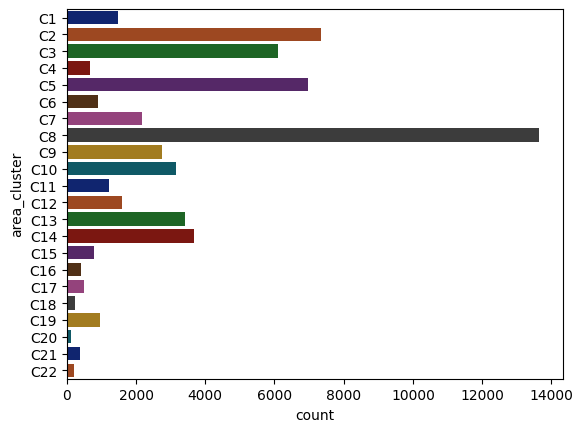

In [94]:
#plotting countplot for area_cluster
sns.countplot(df['area_cluster'], palette='dark')

C8 is having almost double the amount of the proceding class C2



<Axes: xlabel='count', ylabel='engine_type'>

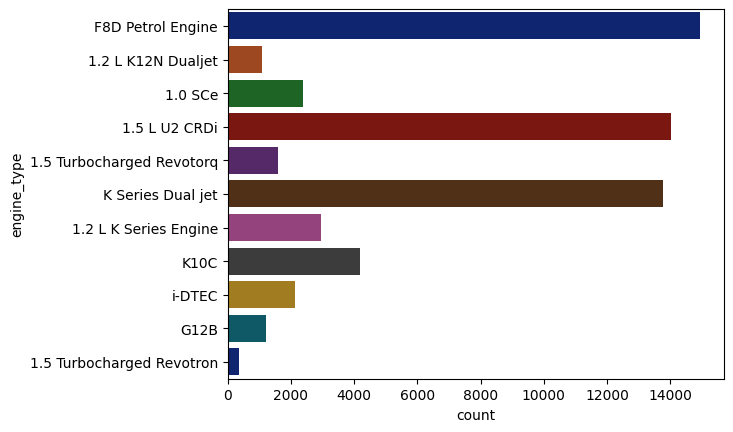

In [95]:
#plotting countplot for engine_type
sns.countplot(df['engine_type'],palette='dark')

<Axes: xlabel='count', ylabel='model'>

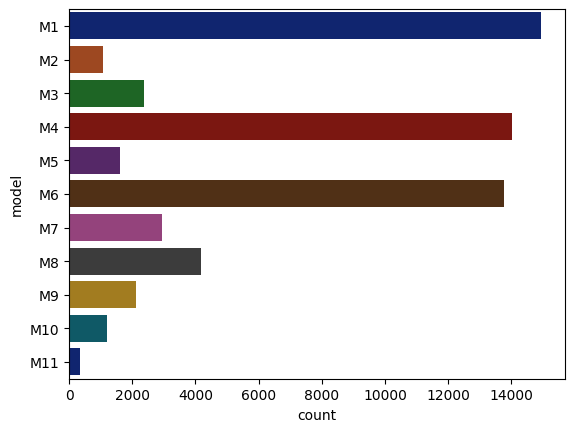

In [96]:
#plotting countplot for model
sns.countplot(df['model'],palette='dark')

Model and engine type are having same count of values, all the cars of model M1 will be having F8D Petrol Engine.

<Axes: xlabel='count', ylabel='segment'>

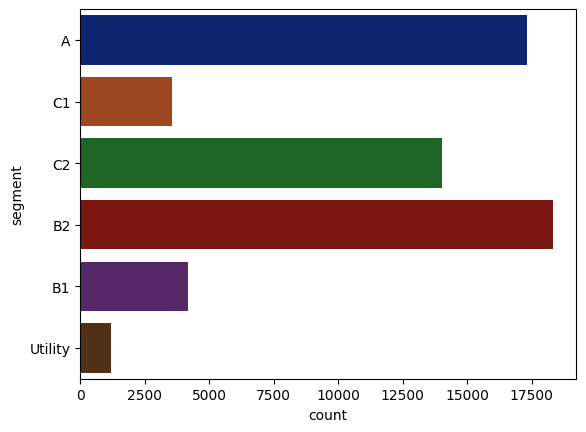

In [97]:
#plotting countplot for segment
sns.countplot(df['segment'], palette='dark')

<Axes: xlabel='count', ylabel='transmission_type'>

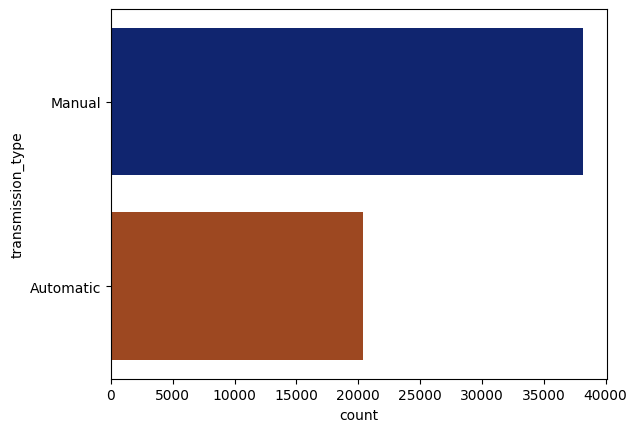

In [98]:
#plotting countplot for transmission_type
sns.countplot(df['transmission_type'], palette='dark')

<Axes: xlabel='count', ylabel='steering_type'>

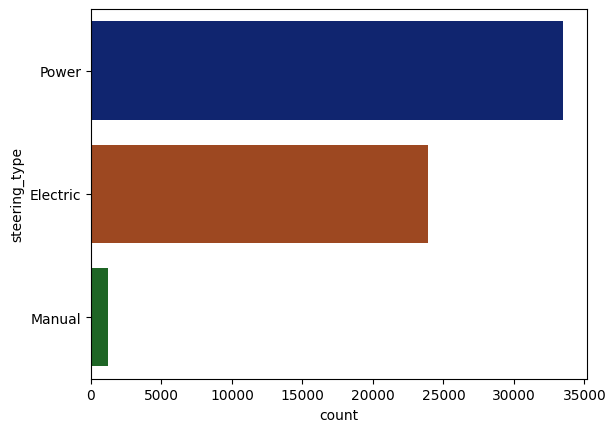

In [99]:
#plotting countplot for steering_type
sns.countplot(df['steering_type'],palette='dark')

As the advancement in the technology we can see very less number of manual steering type car more number of power steering and electric car.

<Axes: xlabel='count', ylabel='rear_brakes_type'>

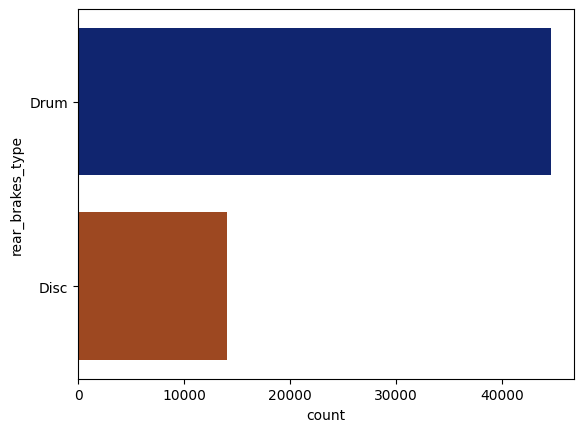

In [100]:
#plotting countplot for rear_brakes_type
sns.countplot(df['rear_brakes_type'],palette='dark')

# Bivariate Analysis

<Axes: xlabel='model', ylabel='make'>

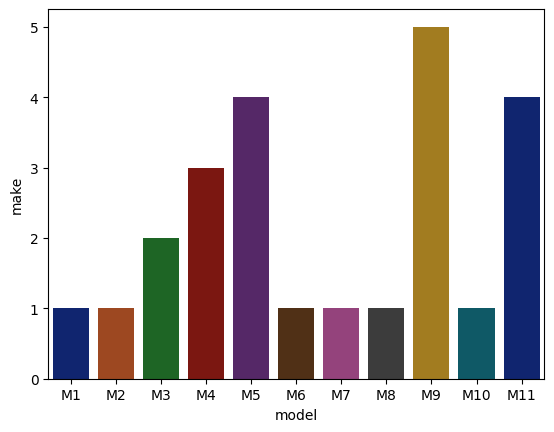

In [101]:
sns.barplot(x=df['model'], y=df['make'], data=df, palette='dark')

<Axes: xlabel='transmission_type', ylabel='gear_box'>

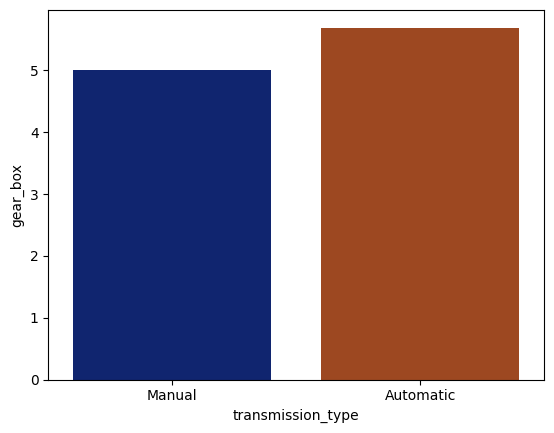

In [102]:
sns.barplot(x=df['transmission_type'], y=df['gear_box'], data=df, palette='dark')

Cars with manual transmission type have 5 gears while automatic has 6 gears

In [103]:
categorical

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type',
       'steering_type'],
      dtype='object')

<Axes: xlabel='segment', ylabel='count'>

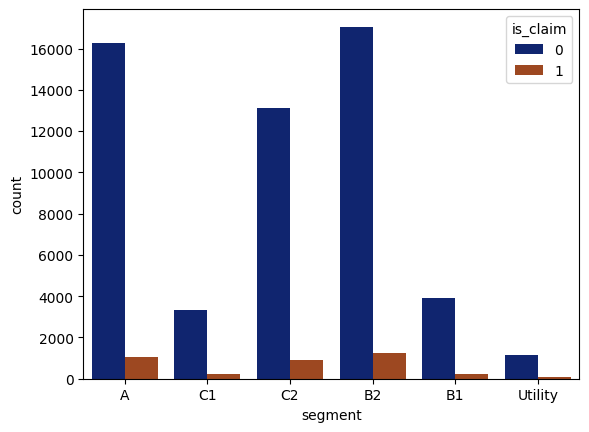

In [104]:
sns.countplot(df, x=df['segment'], hue='is_claim', palette='dark')

<Axes: xlabel='model', ylabel='count'>

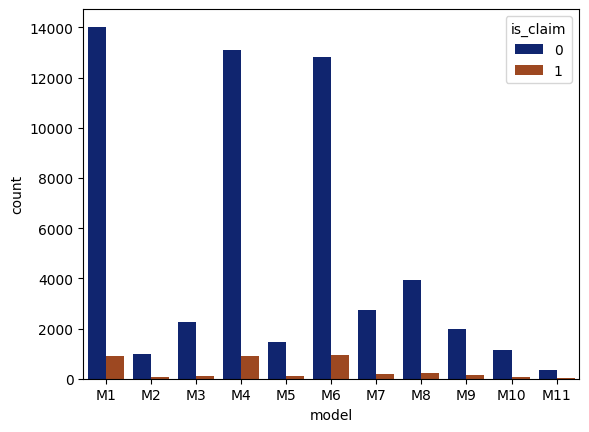

In [105]:
sns.countplot(df, x=df['model'], hue='is_claim', palette='dark')

<Axes: xlabel='fuel_type', ylabel='count'>

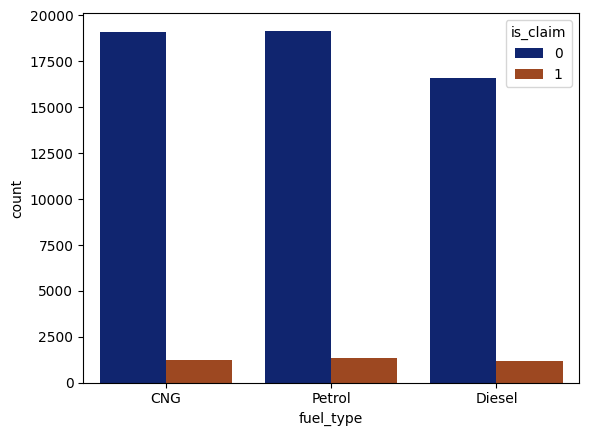

In [106]:
sns.countplot(df, x=df['fuel_type'], hue='is_claim', palette='dark')


We can see the number of all fuel type cars are almost same claiming ratio is also equal.

<Axes: xlabel='rear_brakes_type', ylabel='count'>

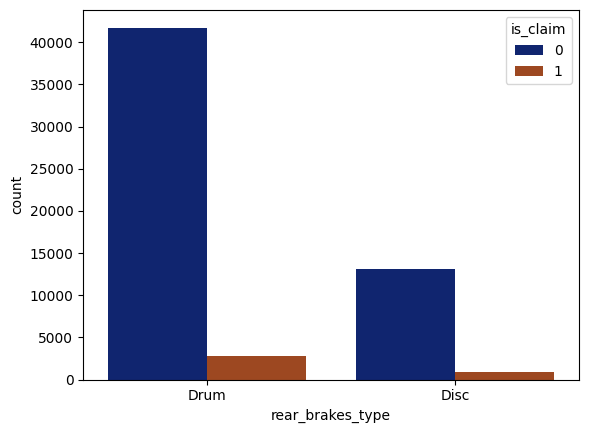

In [107]:
sns.countplot(df, x=df['rear_brakes_type'], hue='is_claim', palette='dark')


<Axes: xlabel='transmission_type', ylabel='count'>

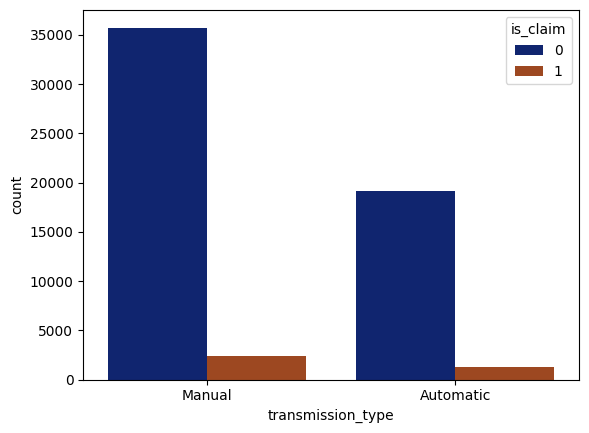

In [108]:
sns.countplot(df, x=df['transmission_type'], hue='is_claim', palette='dark')


<Axes: xlabel='steering_type', ylabel='count'>

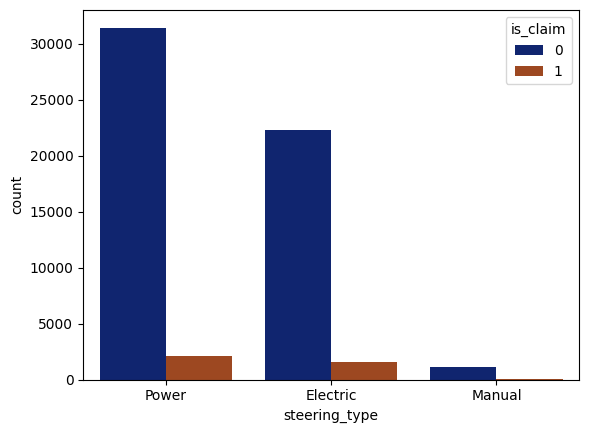

In [109]:
sns.countplot(df, x=df['steering_type'], hue='is_claim', palette='dark')


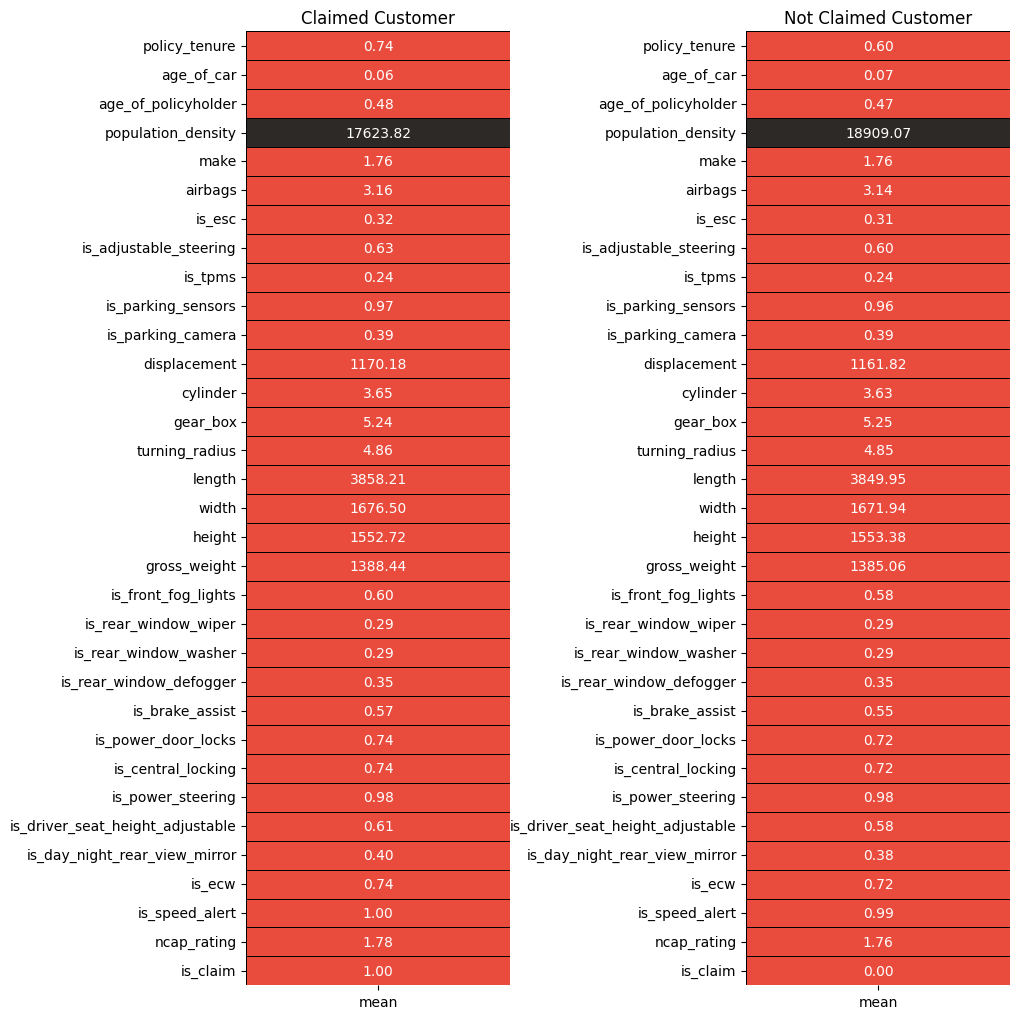

In [110]:
colors = ['#E94B3C', '#2D2926']

claimed = df[df['is_claim']==1].describe().T
not_claimed = df[df['is_claim']==0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.subplot(1,2,1)
sns.heatmap(claimed[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Claimed Customer')

plt.subplot(1,2,2)
sns.heatmap(not_claimed[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Claimed Customer')

fig.tight_layout(pad=0)

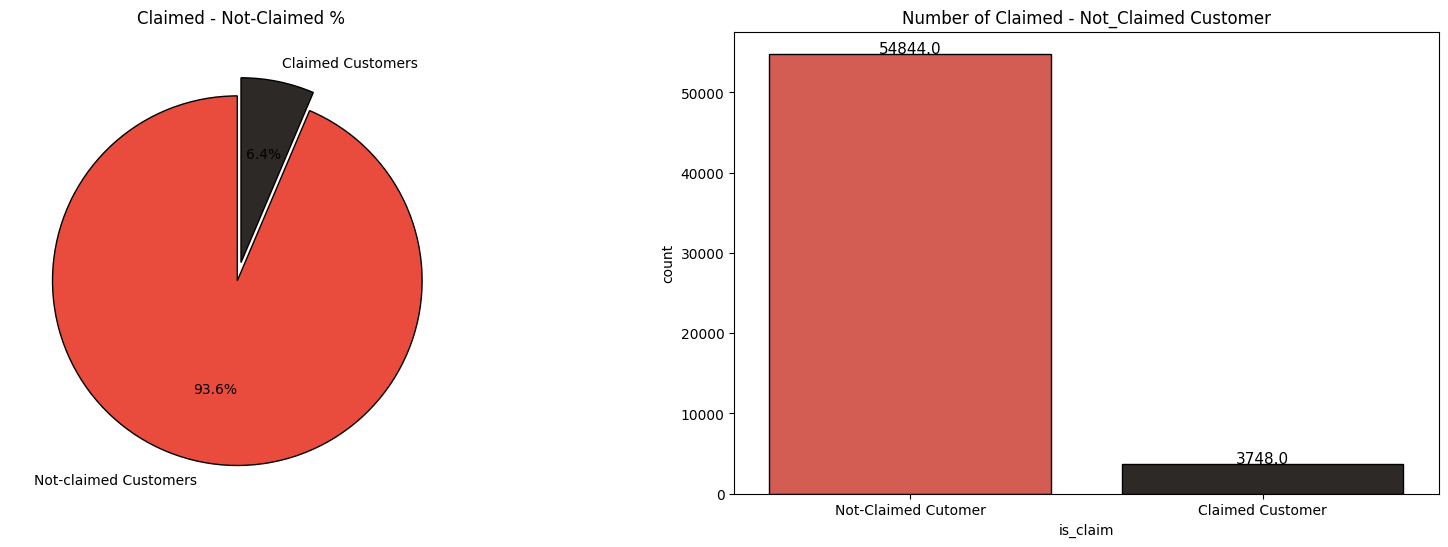

In [111]:
l = list(df['is_claim'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Not-claimed Customers', 'Claimed Customers'], autopct = '%1.1f%%', startangle=90,
        explode = (0.1,0), colors = colors, wedgeprops  = {'edgecolor' : 'black',
                                                           'linewidth':1, 'antialiased' : True})
plt.title('Claimed - Not-Claimed %');

plt.subplot(1,2,2)

ax = sns.countplot(x='is_claim', data = data, palette = colors, edgecolor = 'black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['Not-Claimed Cutomer', 'Claimed Customer'])

plt.title('Number of Claimed - Not_Claimed Customer');
plt.show()

In [115]:
# Exclude the target column
features = df.drop(columns=['is_claim'])

# Select only numeric columns, excluding binary columns
numeric_features = features.select_dtypes(include=['int64','float64'])
binary_columns = [col for col in numeric_features.columns if numeric_features[col].nunique() == 2]
numeric_non_binary_features = numeric_features.drop(columns=binary_columns)

# Identify outliers using IQR method
Q1 = numeric_non_binary_features.quantile(0.25)
Q3 = numeric_non_binary_features.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside of 1.5 * IQR
outliers = ((numeric_non_binary_features < (Q1 - 1.5 * IQR)) | (numeric_non_binary_features > (Q3 + 1.5 * IQR)))

# Print the number of outliers for each column
print("Number of outliers in each numeric feature before treatment:")
print(outliers.sum())

# Treat outliers by capping them to the 1st and 99th percentiles
for col in numeric_non_binary_features.columns:
    lower_bound = numeric_non_binary_features[col].quantile(0.01)
    upper_bound = numeric_non_binary_features[col].quantile(0.99)
    numeric_non_binary_features[col] = np.where(numeric_non_binary_features[col] < lower_bound, lower_bound, numeric_non_binary_features[col])
    numeric_non_binary_features[col] = np.where(numeric_non_binary_features[col] > upper_bound, upper_bound, numeric_non_binary_features[col])

# Replace the original numeric non-binary features with the treated features in the dataset
df[numeric_non_binary_features.columns] = numeric_non_binary_features

# Re-check for outliers
Q1_treated = numeric_non_binary_features.quantile(0.25)
Q3_treated = numeric_non_binary_features.quantile(0.75)
IQR_treated = Q3_treated - Q1_treated

# Define outliers as points outside of 1.5 * IQR
outliers_treated = ((numeric_non_binary_features < (Q1_treated - 1.5 * IQR_treated)) | (numeric_non_binary_features > (Q3_treated + 1.5 * IQR_treated)))

# Print the number of outliers for each column after treatment
print("Number of outliers in each numeric feature after treatment:")
print(outliers_treated.sum())

# Return the treated DataFrame
df.head()  # Display the first few rows of the treated DataFrame


Number of outliers in each numeric feature before treatment:
policy_tenure             0
age_of_car              269
age_of_policyholder     221
population_density     3647
make                      0
airbags                   0
displacement              0
turning_radius            0
length                    0
width                     0
height                    0
gross_weight              0
ncap_rating               0
dtype: int64
Number of outliers in each numeric feature after treatment:
policy_tenure             0
age_of_car                0
age_of_policyholder       0
population_density     3647
make                      0
airbags                   0
displacement              0
turning_radius            0
length                    0
width                     0
height                    0
gross_weight              0
ncap_rating               0
dtype: int64


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990.0,1.0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,0,0,0,1,0,Drum,796.0,3,Manual,5,Power,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0
1,0.672619,0.02,0.375000,C2,27003.0,1.0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,0,0,0,1,0,Drum,796.0,3,Manual,5,Power,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0
2,0.841110,0.02,0.384615,C3,4076.0,1.0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,0,0,0,1,0,Drum,796.0,3,Manual,5,Power,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0
3,0.900277,0.11,0.432692,C4,21622.0,1.0,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2.0,1,1,0,1,1,Drum,1197.0,4,Automatic,5,Electric,4.8,3995.0,1735.0,1515.0,1335.0,1,0,0,1,1,1,1,1,1,1,1,1,2.0,0
4,0.596403,0.11,0.634615,C5,34738.0,2.0,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2.0,0,0,0,0,1,Drum,999.0,3,Automatic,5,Electric,5.0,3731.0,1579.0,1490.0,1155.0,0,0,0,0,0,1,1,1,0,1,1,1,2.0,0


In [116]:
# ordinal_col
# df.max_torque.unique()
df[['max_torque_Nm','max_torque_rpm']] = df['max_torque'].apply(lambda x: pd.Series(str(x).split("@")))
df = df.drop(columns=['max_torque'], axis=1)
df['max_torque_Nm'] = df['max_torque_Nm'].str[:-2].astype(float)
df['max_torque_rpm'] = df['max_torque_rpm'].str[:-3].astype(int)

In [117]:
# ordinal_col
# df.max_power.unique()
df[['max_power_bhp','max_power_rpm']] = df['max_power'].apply(lambda x: pd.Series(str(x).split("@")))
df = df.drop(columns=['max_power'], axis=1)
df['max_power_bhp'] = df['max_power_bhp'].str[:-3].astype(float)
df['max_power_rpm'] = df['max_power_rpm'].str[:-3].astype(int)

In [118]:
# ordinal_col
# df.transmission_type.unique()
df['transmission_type'] = df['transmission_type'].replace({'Manual': 1, 'Automatic': 2})

In [119]:
# ordinal_col
# df.steering_type.unique()
df['steering_type'] = df['steering_type'].replace({'Manual': 1, 'Power': 2, 'Electric': 3})

In [120]:
df.area_cluster.unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [121]:
df.segment.unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [122]:
df.model.unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [123]:
df.fuel_type.unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [124]:
df.engine_type.unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [125]:
df.rear_brakes_type.unique()

array(['Drum', 'Disc'], dtype=object)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  float64
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  float64
 11  is_esc                            58592 non-null  int64  
 12  is_a

In [127]:
# cols_to_encode = ['area_cluster','segment','model','fuel_type','engine_type','rear_brakes_type']
df_encoded = pd.get_dummies(df, columns=['area_cluster','segment','model','fuel_type','engine_type','rear_brakes_type'], drop_first=True, dtype='int')
df_encoded

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum
0,0.515874,0.05,0.644231,4990.0,1.0,2.0,0,0,0,1,0,796.0,3,1,5,2,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.672619,0.02,0.375000,27003.0,1.0,2.0,0,0,0,1,0,796.0,3,1,5,2,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.841110,0.02,0.384615,4076.0,1.0,2.0,0,0,0,1,0,796.0,3,1,5,2,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.900277,0.11,0.432692,21622.0,1.0,2.0,1,1,0,1,1,1197.0,4,2,5,3,4.8,3995.0,1735.0,1515.0,1335.0,1,0,0,1,1,1,1,1,1,1,1,1,2.0,0,113.0,4400,88.50,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0.596403,0.11,0.634615,34738.0,2.0,2.0,0,0,0,0,1,999.0,3,2,5,3,5.0,3731.0,1579.0,1490.0,1155.0,0,0,0,0,0,1,1,1,0,1,1,1,2.0,0,91.0,4250,67.06,5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794.0,2.0,2.0,0,0,0,0,1,999.0,3,2,5,3,5.0,3731.0,1579.0,1490.0,1155.0,0,0,0,0,0,1,1,1,0,1,1,1,2.0,0,91.0,4250,67.06,5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58588,1.199642,0.02,0.519231,7788.0,1.0,2.0,0,0,0,1,0,796.0,3,1,5,2,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,60.0,3500,40.36,6000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
58589,1.162273,0.05,0.451923,34738.0,1.0,2.0,0,0,0,1,0,796.0,3,1,5,2,4.6,3445.0,1515.0,1475.0,1185.0,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
58590,1.236307,0.14,0.557692,8794.0,1.0,2.0,0,1,0,1,0,1197.0,4,1,5,3,4.8,3845.0,1735.0,1530.0,1335.0,1,0,0,0,1,1,1,1,1,1,1,1,2.0,0,113.0,4400,88.50,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0

In [128]:
df_encoded.shape

(58592, 88)

In [129]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded['population_density'] = scaler.fit_transform(df_encoded[['population_density']])
df_encoded['displacement'] = scaler.fit_transform(df_encoded[['displacement']])
df_encoded['length'] = scaler.fit_transform(df_encoded[['length']])
df_encoded['width'] = scaler.fit_transform(df_encoded[['width']])
df_encoded['height'] = scaler.fit_transform(df_encoded[['height']])
df_encoded['gross_weight'] = scaler.fit_transform(df_encoded[['gross_weight']])
df_encoded['max_torque_Nm'] = scaler.fit_transform(df_encoded[['max_torque_Nm']])
df_encoded['max_torque_rpm'] = scaler.fit_transform(df_encoded[['max_torque_rpm']])
df_encoded['max_power_bhp'] = scaler.fit_transform(df_encoded[['max_power_bhp']])
df_encoded['max_power_rpm'] = scaler.fit_transform(df_encoded[['max_power_rpm']])
df_encoded.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum
0,0.515874,0.05,0.644231,-0.783513,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.672619,0.02,0.375000,0.462975,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.841110,0.02,0.384615,-0.835268,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.900277,0.11,0.432692,0.158275,1.0,2.0,1,1,0,1,1,0.130093,4,2,5,3,4.8,0.464026,0.561881,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,2.0,0,-0.293261,1.194047,0.343811,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0.596403,0.11,0.634615,0.900969,2.0,2.0,0,0,0,0,1,-0.613422,3,2,5,3,5.0,-0.383610,-0.831734,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,2.0,0,-0.594029,0.987423,-0.430223,0.210345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [130]:
df_encoded.isnull().sum().sum()

0

In [131]:
df_encoded.is_claim

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

## Correlation Analysis

In [132]:
# correlation_matrix = df[numerical].corr()

# # Display the correlation matrix
# plt.figure(figsize=(16, 12))
# sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [133]:
# Calculate the correlation matrix
correlation_matrix = df[numerical].corr()

# Extract correlations with 'is_claim'
target_corr = correlation_matrix['is_claim'].sort_values(ascending=False)

# Display the correlations
target_corr

is_claim                            1.000000
policy_tenure                       0.078752
age_of_policyholder                 0.022034
is_adjustable_steering              0.013917
cylinder                            0.013434
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
width                               0.010068
is_parking_sensors                  0.008419
is_day_night_rear_view_mirror       0.007989
displacement                        0.007678
is_speed_alert                      0.007307
is_ecw                              0.006637
is_central_locking                  0.006637
is_power_door_locks                 0.006637
length                              0.006495
gross_weight                        0.003894
ncap_rating                         0.003800
is_esc                              0.002995
airbags                             0.002789
turning_radius                      0.002724
is_rear_wi

### Conclusion from Correlation Analysis
1) Policy Tenure (0.078747): There is a slight positive correlation between the policy tenure and the likelihood of a claim being made.
2) Age of Policyholder (0.022435): A very weak positive correlation, which shows that a slight increase in claim probability with the age of the policyholder.
3)  Make (-0.000456), Gear Box (-0.000635), Height (-0.002024), Population Density (-0.017808), Age of Car (-0.028172): These features show very weak negative correlations with claim probability, which shows that these features has minimal to no impact on the target variable.

In [134]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'displacement', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm'],
      dtype='object')

### Chi-Squared Test

In [135]:
# Chi-Square Test
from scipy.stats import chi2_contingency
categorical_features = [
       'area_cluster', 'make', 'segment', 'model',
       'fuel_type', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating']
chi2_result = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['is_claim'])
    chi2,p,_,_ = chi2_contingency(contingency_table)
    chi2_result[col] = (chi2, p)

print("\nChi2 Result: ")
for key, value in chi2_result.items():
    print(f"{key}: chi2={value[0]:.4f}, p-value={value[1]:.4f}")


Chi2 Result: 
area_cluster: chi2=96.0826, p-value=0.0000
make: chi2=4.4240, p-value=0.3517
segment: chi2=12.6039, p-value=0.0274
model: chi2=19.9750, p-value=0.0295
fuel_type: chi2=5.7596, p-value=0.0561
engine_type: chi2=19.9750, p-value=0.0295
airbags: chi2=0.6211, p-value=0.7330
is_esc: chi2=0.4995, p-value=0.4797
is_adjustable_steering: chi2=11.2315, p-value=0.0008
is_tpms: chi2=0.0226, p-value=0.8805
is_parking_sensors: chi2=3.9806, p-value=0.0460
is_parking_camera: chi2=0.0375, p-value=0.8465
rear_brakes_type: chi2=0.0226, p-value=0.8805
cylinder: chi2=10.4604, p-value=0.0012
transmission_type: chi2=0.0186, p-value=0.8914
gear_box: chi2=0.0180, p-value=0.8932
steering_type: chi2=5.7361, p-value=0.0568
is_front_fog_lights: chi2=8.0951, p-value=0.0044
is_rear_window_wiper: chi2=0.3881, p-value=0.5333
is_rear_window_washer: chi2=0.3881, p-value=0.5333
is_rear_window_defogger: chi2=0.3706, p-value=0.5427
is_brake_assist: chi2=6.8632, p-value=0.0088
is_power_door_locks: chi2=2.5210, 

According to Chi2 test most significant features for predicting is_claim are:


*   area_cluster
*   is_adjusting_steering


*   cylinder
*   is_front_fog_lights





## ANOVA Testing

In [136]:
# ANOVA Test
from scipy.stats import f_oneway
anova_results = []

# Perform One-Way ANOVA for each numerical feature
for col in numerical:
    if col != 'is_claim':
        groups = [df[df['is_claim'] == value][col] for value in df['is_claim'].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results.append({
            'Feature': col,
            'F-statistic': f_stat,
            'p-value': f"{p_value:.4f}"
        })

# Convert the results to a DataFrame
anova_results_df = pd.DataFrame(anova_results)
anova_results_df.sort_values(by='F-statistic', ascending=False, inplace=True)

anova_results_df

,Feature,F-statistic,p-value
0,policy_tenure,365.637950,0.0000
1,age_of_car,45.854207,0.0000
2,age_of_policyholder,28.459334,0.0000
3,population_density,18.586944,0.0000
7,is_adjustable_steering,11.349446,0.0008
12,cylinder,10.575143,0.0011
19,is_front_fog_lights,8.193592,0.0042
23,is_brake_assist,6.952926,0.0084
27,is_driver_seat_height_adjustable,6.691007,0.0097
16,width,5.939390,0.0148


From the above results from Chi2 test again some of the features from ANOVA test seems to be important features:


*   policy_tenure
*   age_of_car


*   age_of_policyholder
*   population_density





In [137]:
df_encoded

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum
0,0.515874,0.05,0.644231,-0.783513,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.672619,0.02,0.375000,0.462975,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.841110,0.02,0.384615,-0.835268,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.900277,0.11,0.432692,0.158275,1.0,2.0,1,1,0,1,1,0.130093,4,2,5,3,4.8,0.464026,0.561881,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,2.0,0,-0.293261,1.194047,0.343811,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0.596403,0.11,0.634615,0.900969,2.0,2.0,0,0,0,0,1,-0.613422,3,2,5,3,5.0,-0.383610,-0.831734,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,2.0,0,-0.594029,0.987423,-0.430223,0.210345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,-0.568111,2.0,2.0,0,0,0,0,1,-0.613422,3,2,5,3,5.0,-0.383610,-0.831734,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,2.0,0,-0.594029,0.987423,-0.430223,0.210345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
58588,1.199642,0.02,0.519231,-0.625076,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
58589,1.162273,0.05,0.451923,0.900969,1.0,2.0,0,0,0,1,0,-1.375713,3,1,5,2,4.6,-1.301882,-1.403473,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,0.0,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Model Building

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC


# Separate features and target
X = df_encoded.copy(deep=True)
y = data['is_claim']


In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
# Separate features and target
x = df_encoded.drop(columns=['is_claim'])
y = df_encoded['is_claim']

In [141]:
# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [142]:
# Check the distribution after SMOTE
print(pd.Series(y_resampled).value_counts())

is_claim
0    54844
1    54844
Name: count, dtype: int64


In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59     11092
           1       0.59      0.61      0.60     10846

    accuracy                           0.60     21938
   macro avg       0.60      0.60      0.60     21938
weighted avg       0.60      0.60      0.60     21938

ROC AUC: 0.6313


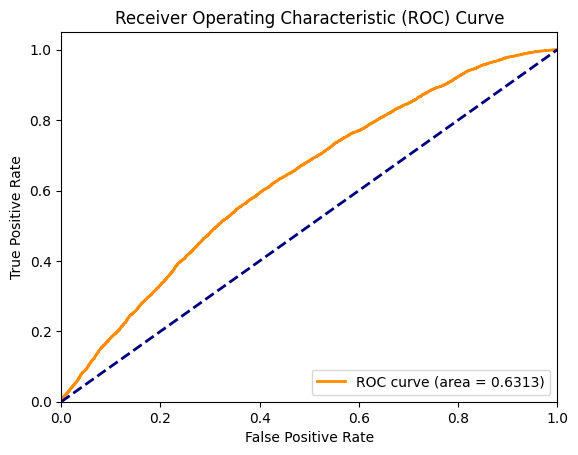

In [144]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11092
           1       0.91      0.93      0.92     10846

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938

ROC AUC: 0.9186


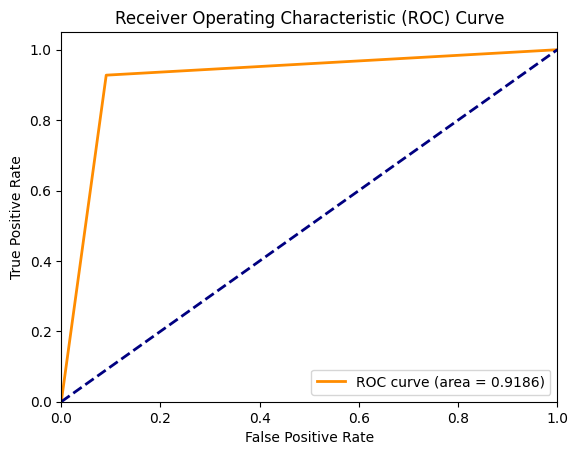

In [145]:
from sklearn.tree import DecisionTreeClassifier
# Train a Logistic Regression model with class weights
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(x_test)
dt_y_prob = dt_model.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, dt_y_pred))
roc_auc = roc_auc_score(y_test, dt_y_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11092
           1       0.90      0.92      0.91     10846

    accuracy                           0.91     21938
   macro avg       0.91      0.91      0.91     21938
weighted avg       0.91      0.91      0.91     21938

ROC AUC: 0.9695


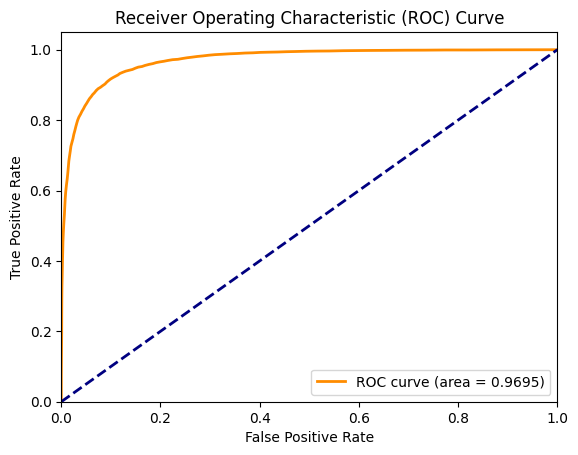

In [146]:
from sklearn.ensemble import RandomForestClassifier
# Train a Logistic Regression model with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(x_test)
rf_y_prob = rf_model.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, rf_y_pred))
roc_auc = roc_auc_score(y_test, rf_y_prob)
print(f'ROC AUC: {roc_auc:.4f}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     11092
           1       0.95      0.85      0.89     10846

    accuracy                           0.90     21938
   macro avg       0.91      0.90      0.90     21938
weighted avg       0.90      0.90      0.90     21938

ROC AUC: 0.9457


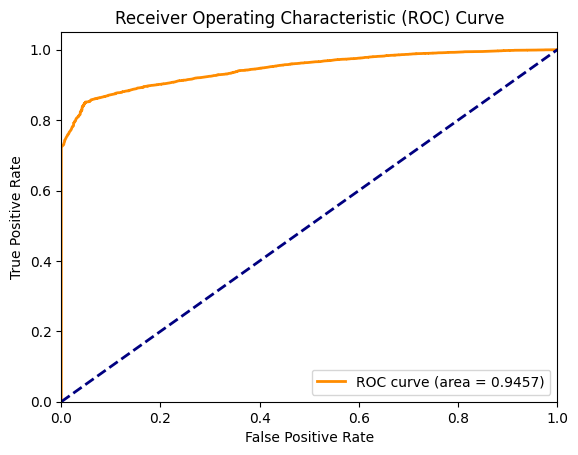

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
# Train a Logistic Regression model with class weights
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(x_test)
gb_y_prob = gb_model.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, gb_y_pred))
roc_auc = roc_auc_score(y_test, gb_y_prob)
print(f'ROC AUC: {roc_auc:.4f}')


# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, gb_y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11092
           1       0.99      0.89      0.93     10846

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938

ROC AUC: 0.9703


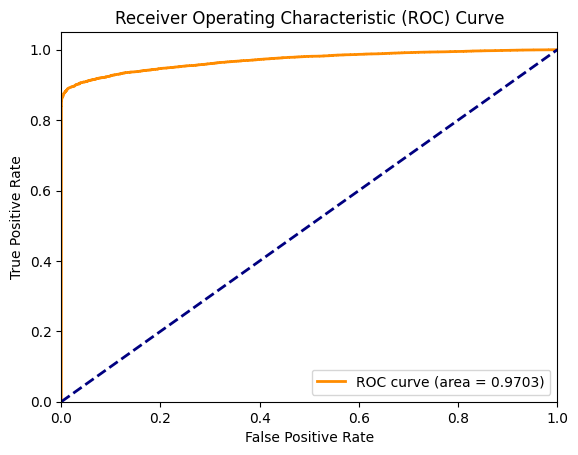

In [148]:
from xgboost import XGBClassifier
# Train a Logistic Regression model with class weights
xb_model = XGBClassifier(random_state=42)
xb_model.fit(x_train, y_train)

# Make predictions
xb_y_pred = xb_model.predict(x_test)
xb_y_prob = xb_model.predict_proba(x_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, xb_y_pred))
roc_auc = roc_auc_score(y_test, xb_y_prob)
print(f'ROC AUC: {roc_auc:.4f}')


# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, xb_y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning

In [149]:
# Define Models
lr_model = Pipeline(steps=[("classifier", LogisticRegression())])
xgb_model = Pipeline(steps=[("classifier", XGBClassifier())])
gra_model = Pipeline(steps=[("classifier", GradientBoostingClassifier())])
rf_model = Pipeline(steps=[("classifier", RandomForestClassifier())])
dt_model = Pipeline(steps=[("classifier", DecisionTreeClassifier())])

In [150]:
estimators = [('lr', lr_model), ('rf', rf_model), ('gd', gra_model), ('xgb', xgb_model), ('dt', dt_model)]

In [151]:
# Define hyperparameter grid for XGBClassifier
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

In [152]:
# Perform hyperparameter tuning with GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
xgb_grid_search.fit(x_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
print("Best parameters found for XGBClassifier: ", xgb_grid_search.best_params_)
print("Best cross-validation ROC AUC score for XGBClassifier: ", '{0:.2%}'.format(xgb_grid_search.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found for XGBClassifier:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best cross-validation ROC AUC score for XGBClassifier:  96.47%


In [153]:
# Define models including the tuned XGBClassifier
models = {
    "Logistic Regression": lr_model,
    "Gradient Boosting": gra_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
    "XGBoost Classifier": best_xgb_model,
}

# Evaluate models
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    results[name] = (accuracy, precision, recall, f1, roc_auc)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print(f"ROC AUC Score: {roc_auc:.2%}")
    print()

# Comparing the models
best_model_name = max(results, key=lambda k: results[k][4])  # ROC AUC score
best_accuracy, best_precision, best_recall, best_f1, best_roc_auc = results[best_model_name]
print(f"The Best Model is {best_model_name} with ROC AUC score of {best_roc_auc:.2%}, "
      f"Accuracy: {best_accuracy:.2%}, Precision: {best_precision:.2%}, Recall: {best_recall:.2%}, "
      f"and F1 Score: {best_f1:.2%}")

Logistic Regression:
Accuracy: 59.62%
Precision: 58.70%
Recall: 61.83%
F1 Score: 60.22%
ROC AUC Score: 63.08%

Gradient Boosting:
Accuracy: 90.06%
Precision: 94.70%
Recall: 84.64%
F1 Score: 89.39%
ROC AUC Score: 94.57%

Random Forest:
Accuracy: 90.68%
Precision: 89.94%
Recall: 91.37%
F1 Score: 90.65%
ROC AUC Score: 96.90%

Decision Tree:
Accuracy: 91.97%
Precision: 91.06%
Recall: 92.87%
F1 Score: 91.96%
ROC AUC Score: 91.98%

XGBoost Classifier:
Accuracy: 92.03%
Precision: 96.84%
Recall: 86.70%
F1 Score: 91.49%
ROC AUC Score: 96.56%

The Best Model is Random Forest with ROC AUC score of 96.90%, Accuracy: 90.68%, Precision: 89.94%, Recall: 91.37%, and F1 Score: 90.65%
